# SEM - Lasso semi-auto for SF OTU guilds v2.0

- forks from "SEM - Lasso semi-auto for SF OTU guilds v1.12.ipynb"
- intent is to DECREASE run/load times with external modules (from 30-60 min to set up )
- makes Figure S10

In [57]:
library(tibble)
`%notin%` <- Negate(`%in%`)

In [58]:
setwd('~/Documents/GitHub/SF_microbe_methane/SEM_code/')

# 1) load R libraries, own lasSEM modules / functions, data

- TODO:
- need to clean new modules below, especially example data (and redundancies)
- note some misplaced package loading within modules
- and some setwd's likely to make problems


- Also need to extract many definitions from that code (colors, variable & composite lists, SEM feats)
- move to 2) below

In [59]:
# load packages, earlier R modules
source('lasSEM_R_modules/lasSEM_0_import_modules_v1.12.R') # -- this has a wd reset in it!
setwd('~/Documents/GitHub/SF_microbe_methane/SEM_code/')

In [60]:
# load data, SHOULD BE SIMPLIFIED or R.data
# - note flat files were written, still contains many defs
# suppressWarnings(source('lasSEM_R_modules/lasSEM_1_2_import_data_guilds_meta_v1.12.R'))
# Don't need this because already saved the files needed
# Data (all and Delta only)
Guild_CH4 <- read.table("~/Documents/GitHub/SF_microbe_methane/data/SEM_data/SEM_base_log2_10_all_guild_soil_data.txt")
dim(Guild_CH4)
head(Guild_CH4)

Guild_CH4_d <- read.table("~/Documents/GitHub/SF_microbe_methane/data/SEM_data/SEM_base_log2_10_delta_guild_soil_data.txt")
dim(Guild_CH4_d)
head(Guild_CH4_d)

[1] 152  51

,Sample,CH4_ug_m2_h,CH4_logn1,CO2_mg_m2_h,CH4_CO2,Bulk_dens,H2O_FPS,pH,C,N,⋯,Actino,Chlorf,Firmic,AO_NOB,NOB_AO,mcr_pmo,pmo_mcr,CH4_all,CH4_ac_mix,MOB_all
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Browns_ThreeSqA_D1,0.472344434,0.5218678,1.05517851,-1.582834,-0.4475316,1.871870,0.7958800,0.9127533,-0.2225732,⋯,14.71778,15.35749,12.03718,0.84482076,-0.84482076,-7.514671,7.514671,8.781141,7.927983,15.01202
2,Browns_ThreeSqA_D2,0.472344434,0.5218678,1.05517851,-1.582834,-0.4304467,1.863437,0.7817554,0.8561244,-0.3010300,⋯,14.69337,15.54305,13.06765,0.14351626,-0.14351626,-6.797039,6.797039,10.377120,9.275425,16.22609
3,Browns_ThreeSqB_D1,0.005190917,0.1368549,0.56450338,-1.559312,-0.4583895,1.876980,0.7944880,0.9227255,-0.2276783,⋯,14.94039,15.21020,11.94527,0.90191500,-0.90191500,-8.156083,8.156083,7.841561,6.998851,14.98501
4,Browns_ThreeSqB_D2,0.005190917,0.1368549,0.56450338,-1.559312,-0.3957837,1.844697,0.7730547,0.8082110,-0.3381873,⋯,13.90484,15.60783,11.73935,-0.09574985,0.09574985,-7.037079,7.037079,9.102746,7.576630,15.48129
7,Browns_TuleA_D2,0.038122722,0.1614124,0.03842647,-1.000304,-0.3031784,1.842354,0.7589119,0.7315888,-0.4100504,⋯,14.94913,15.50704,13.57540,-0.06451276,0.06451276,-6.886575,6.886575,9.626566,8.506827,15.57561
8,Browns_TuleB_D1,0.267422593,0.3442878,0.43166113,-1.164239,-0.4105685,1.864015,0.7817554,0.8591383,-0.2806687,⋯,13.98774,15.13678,10.42214,0.75954597,-0.75954597,-9.528989,9.528989,5.433031,4.673630,13.67311


[1] 65 51

,Sample,CH4_ug_m2_h,CH4_logn1,CO2_mg_m2_h,CH4_CO2,Bulk_dens,H2O_FPS,pH,C,N,⋯,Actino,Chlorf,Firmic,AO_NOB,NOB_AO,mcr_pmo,pmo_mcr,CH4_all,CH4_ac_mix,MOB_all
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Browns_ThreeSqA_D1,0.472344434,0.5218678,1.05517851,-1.582834,-0.4475316,1.871870,0.7958800,0.9127533,-0.2225732,⋯,14.71778,15.35749,12.03718,0.84482076,-0.84482076,-7.514671,7.514671,8.781141,7.927983,15.01202
2,Browns_ThreeSqA_D2,0.472344434,0.5218678,1.05517851,-1.582834,-0.4304467,1.863437,0.7817554,0.8561244,-0.3010300,⋯,14.69337,15.54305,13.06765,0.14351626,-0.14351626,-6.797039,6.797039,10.377120,9.275425,16.22609
3,Browns_ThreeSqB_D1,0.005190917,0.1368549,0.56450338,-1.559312,-0.4583895,1.876980,0.7944880,0.9227255,-0.2276783,⋯,14.94039,15.21020,11.94527,0.90191500,-0.90191500,-8.156083,8.156083,7.841561,6.998851,14.98501
4,Browns_ThreeSqB_D2,0.005190917,0.1368549,0.56450338,-1.559312,-0.3957837,1.844697,0.7730547,0.8082110,-0.3381873,⋯,13.90484,15.60783,11.73935,-0.09574985,0.09574985,-7.037079,7.037079,9.102746,7.576630,15.48129
5,Browns_TuleA_D2,0.038122722,0.1614124,0.03842647,-1.000304,-0.3031784,1.842354,0.7589119,0.7315888,-0.4100504,⋯,14.94913,15.50704,13.57540,-0.06451276,0.06451276,-6.886575,6.886575,9.626566,8.506827,15.57561
6,Browns_TuleB_D1,0.267422593,0.3442878,0.43166113,-1.164239,-0.4105685,1.864015,0.7817554,0.8591383,-0.2806687,⋯,13.98774,15.13678,10.42214,0.75954597,-0.75954597,-9.528989,9.528989,5.433031,4.673630,13.67311


[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1"
[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1"


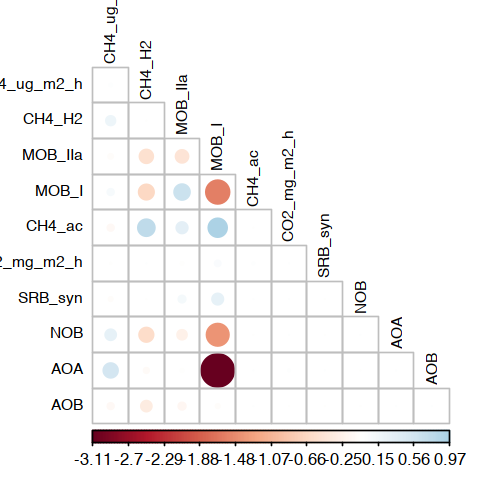

In [61]:
# Updated define_new_sem_table function
suppressWarnings(source('lasSEM_R_modules/lasSEM_3_SEM_basics_MI_COV_v1.12.R'))

In [62]:
source('lasSEM_R_modules/lasSEM_4_SEM_basics_example_v1.12.R')

In [70]:
# Colors
library(rlang)
Guild_cols <- read.table("~/Documents/GitHub/SF_microbe_methane/data/colors/Guild_color_palette.txt", sep='\t') %>%
  dplyr::select(Guild, G_index, color) %>%
  set_names(c("Guild", "Index", "color")) %>%
  mutate(Index = rev(Index)) %>%
  add_row(Guild = "CH4_me", Index = 16, color = "#FDC086") %>%
  add_row(Guild = "CH4_mix", Index = 17, color = "#FFFF99") %>%
  arrange(Index)
Guild_cols
guild_colors <- Guild_cols
guild_colors_noFeOB <- Guild_cols %>%
    filter(Guild != "FeOB")

,Guild,Index,color
,<chr>,<dbl>,<chr>
15,FeRB,1,#8B4513
14,FeOB,2,#CD6600
13,SRB,3,#8B008B
12,SRB_syn,4,#CD2990
11,SOxB,5,#CD69C9
10,Anamx,6,#00FF7F
9,NOB,7,#008B00
8,AOB,8,#00CD00
7,AOA,9,#7CFC00


In [71]:
source('lasSEM_R_modules/lasSEM_5_ML_feat_sel_LAS_GLM_SEM_v1.12.R')

[1] "best_lambda: 0.041"
     R2  RMSE
1 0.862 0.398


ERROR: Error in lavParseModelString(model): lavaan ERROR: model does not contain lavaan syntax (no operators found)


In [72]:
# Remove sample names
Guild_CH4_d0 <- Guild_CH4_d
row.names(Guild_CH4_d0) <- Guild_CH4_d0$Sample
Guild_CH4_d0 <- Guild_CH4_d0[,-1]

# names(Guild_CH4_d)

# prepare data subsets

# get vars
xvars0 <- names(Guild_CH4_d0)

In [73]:
# Get combined drop lists
drop_vars1 <- c(drop_gas, drop_pw, drop_guilds, drop_taxa, drop_ratios)

# Select guild & chem data:                # Remove drop vars from list
xvars1 <- xvars0[!xvars0 %in% drop_vars1]

[1] "best_lambda: 0.041"
     R2  RMSE
1 0.862 0.398


[1] "CO2_mg_m2_h" "Bulk_dens"   "H2O_FPS"     "pH"          "CH4_ac"     
 [6] "CH4_me"      "MOB_IIa"     "ANME"        "AOB"         "CH4_ac_mix"

,n_pred,AIC,BIC,AICc,model,all_sig
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
700,7,77.24463,94.63973,79.81606,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + MOB_IIa + ANME + CH4_ac_mix,yes
429,6,78.24550,93.46621,80.21042,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME + AOB,yes
439,6,79.93356,95.15427,81.89847,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + MOB_IIa + ANME + CH4_ac_mix,yes
191,5,80.86829,93.91461,82.31656,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes
420,6,82.15703,97.37774,84.12194,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + pH + ANME + CH4_ac_mix,yes
201,5,82.72998,95.77630,84.17826,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + ANME + AOB,yes
432,6,83.48311,98.70382,85.44802,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_me + MOB_IIa + ANME,yes
257,5,83.94050,96.98683,85.38878,CH4_logn1 ~ CO2_mg_m2_h + MOB_IIa + ANME + CH4_ac_mix,yes
244,5,85.24353,98.28986,86.69181,CH4_logn1 ~ CO2_mg_m2_h + CH4_ac + MOB_IIa + ANME,yes


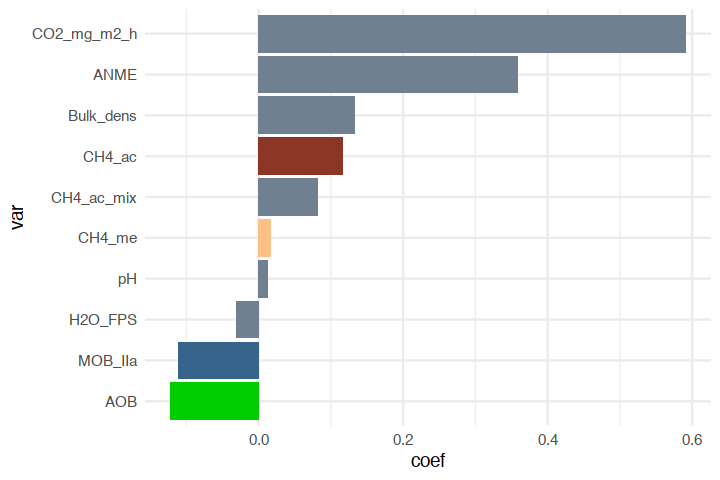

In [74]:
# Troubleshoot - look at code in the module
y_var <- 'CH4_logn1'
x_vars <- xvars1
Guild_CH4_dS <- scale(Guild_CH4_d[,-1])              #  careful will scale y 
Guild_CH4_dS_df <- data.frame(Guild_CH4_dS)          #  make df
Guild_CH4_dS_df$CH4_logn1 <- Guild_CH4_d0$CH4_logn1  # fix CH4 scale to original
CH4_lass0 <- glmnet_lassoCV(y_var, x_vars, Guild_CH4_d0)
vars <- glmnet_coefs(CH4_lass0, output = 'vars')      # return only list of signif vars
vars
names(guild_colors)[1] <- "var"
CH4_lass0_cplot <- plot_lasso_coefs(CH4_lass0, guild_colors)
options(repr.plot.width=6, repr.plot.height=4)
CH4_lass0_cplot
subs <- all_subsets_whhP('CH4_logn1', vars, Guild_CH4_dS_df, p_cut = 0.05, sort = "AIC", ncores = 20)
# dim(subs); 
subs[1:20,]  # show output

In [75]:
# Note, no MeOB
guild_vars <- Guild_cols %>%
    filter(Guild != "MeOB")

### Figure S10

In [76]:
# plot_lasso_coefs plot code
names(guild_colors)[1] <- "var"
plot_lasso_coefs = function(model_out, colors, nafill = '#708090'){

    # dev lasso effects plot
    coefs <- glmnet_coefs(model_out)              # Get significant effects

    # merge w colors
    coef_color <- data.frame(merge(coefs, colors, all.x=T, by = 'var'))     # coef_color
    colors2 <- as.character(coef_color$color)                               # only levels of var used  
    colors2[is.na(colors2)] <- '#708090'                                    # replace NA color 
    coef_color$color <- as.factor(colors2)                                  # replace colors (levels)
                         
    # reorder data / factors by coef
    coef_color <- coef_color[order(coef_color$coef, decreasing = TRUE),]                       # sort by coef
    coef_color$var <- reorder(coef_color$var, -coef_color$coef)              # reorder var by coef
    coef_color$color <- reorder(coef_color$color, -coef_color$coef)          # reorder color by coef

    # Make ggplot 
    plot_colors <- c(paste(coef_color$color))                               # Get colors for ggplot

    plot <- ggplot(data=coef_color, 
                   aes(x=var, y=coef, fill = var)) +       # base plot
                geom_bar(stat="identity") + 
                scale_fill_manual(values= plot_colors) +  # fill by 
                #geom_hline(yintercept=0) +                                            # add y = 0 line
                coord_flip() + 
                theme_minimal() + 
                theme(legend.position = "none")       # flip; clean plot

    return(plot)
}

## Figure 10a

[1] "best_lambda: 0.0239"
     R2  RMSE
1 0.649 0.628


[1] "FeRB"    "FeOB"    "SRB"     "SOxB"    "Anamx"   "AOB"     "MOB_IIa"
 [8] "MOB_II"  "MOB_I"   "CH4_ac"

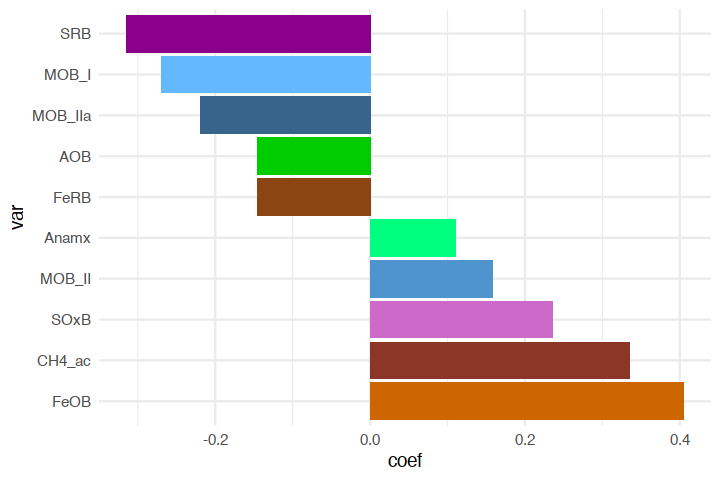

In [77]:
# Need to get this plot for guilds only, and then the genera in those guilds (Figure S10)
y_var <- 'CH4_logn1'
x_vars <- guild_vars$Guild

# Remove sample names
Guild_CH4_d0 <- Guild_CH4_d
row.names(Guild_CH4_d0) <- Guild_CH4_d0$Sample
Guild_CH4_d0 <- Guild_CH4_d0[,-1]

Guild_CH4_dS <- scale(Guild_CH4_d[,-1])              #  careful will scale y 
Guild_CH4_dS_df <- data.frame(Guild_CH4_dS)          #  make df
Guild_CH4_dS_df$CH4_logn1 <- Guild_CH4_d0$CH4_logn1  # fix CH4 scale to original
CH4_lass0 <- glmnet_lassoCV(y_var, x_vars, Guild_CH4_d0)
vars <- glmnet_coefs(CH4_lass0, output = 'vars')      # return only list of signif vars
vars
names(guild_colors)[1] <- "var"
CH4_lass0_cplot <- plot_lasso_coefs(CH4_lass0, guild_colors)
options(repr.plot.width=6, repr.plot.height=4)
CH4_lass0_cplot

In [15]:
coefs <- glmnet_coefs(CH4_lass0)              # Get significant effects

In [16]:
# merge w colors
coef_color <- data.frame(merge(coefs, guild_colors, all.x=T, by = 'var'))     # coef_color
colors2 <- as.character(coef_color$color)                               # only levels of var used  
colors2[is.na(colors2)] <- '#708090'                                    # replace NA color 
coef_color$color <- as.factor(colors2)                                  # replace colors (levels)

In [17]:
# reorder data / factors by coef
coef_color <- coef_color[order(coef_color$coef),]                       # sort by coef
coef_color$var <- reorder(coef_color$var, coef_color$coef)              # reorder var by coef
coef_color$color <- reorder(coef_color$color, coef_color$coef)          # reorder color by coef

In [18]:
coef_color

,var,coef,Index,color
,<fct>,<dbl>,<dbl>,<fct>
10,SRB,-0.3143048,3,#8B008B
6,MOB_I,-0.2700045,13,#63B8FF
8,MOB_IIa,-0.2186047,11,#36648B
2,AOB,-0.1457117,8,#00CD00
5,FeRB,-0.1452769,1,#8B4513
1,Anamx,0.1100175,6,#00FF7F
7,MOB_II,0.1576897,12,#4F94CD
9,SOxB,0.2361266,5,#CD69C9
3,CH4_ac,0.3345343,14,#8B3626


In [19]:
Guild_cols$Guild %in% coef_color$var

[1]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
[13]  TRUE  TRUE FALSE FALSE FALSE

In [20]:
Guild_cols$Guild

[1] "FeRB"    "FeOB"    "SRB"     "SRB_syn" "SOxB"    "Anamx"   "NOB"    
 [8] "AOB"     "AOA"     "MeOB"    "MOB_IIa" "MOB_II"  "MOB_I"   "CH4_ac" 
[15] "CH4_H2"  "CH4_me"  "CH4_mix"

In [21]:
# Add non-sig guilds (n = 7)
coef_color <- coef_color %>%
  add_row(var = "SRB_syn", coef = 0, Index = 4, color = "white") %>%
  add_row(var = "NOB", coef = 0, Index = 7, color = "white") %>%
  add_row(var = "AOA", coef = 0, Index = 9, color = "white") %>%
  add_row(var = "CH4_H2", coef = 0, Index = 15, color = "white") %>%
  add_row(var = "CH4_me", coef = 0, Index = 16, color = "white") %>%
  add_row(var = "CH4_mix", coef = 0, Index = 17, color = "white")

In [22]:
# reorder data / factors by coef
coef_color <- coef_color[order(coef_color$coef, decreasing = TRUE),]                       # sort by coef
coef_color$var <- reorder(coef_color$var, -coef_color$coef)              # reorder var by coef
coef_color$color <- reorder(coef_color$color, -coef_color$coef)          # reorder color by coef

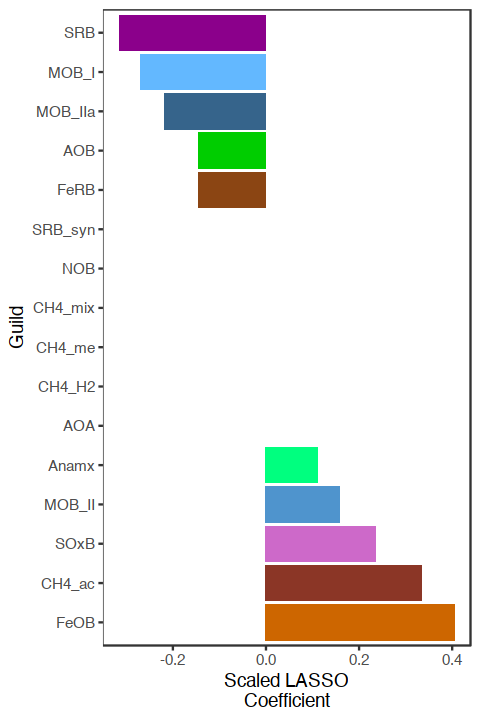

In [23]:
# Make ggplot
options(repr.plot.width = 4, repr.plot.height = 6)
plot_colors <- c(paste(coef_color$color))
figS10a <- ggplot(data = coef_color, aes(x = var, y = coef, fill = var)) +
    geom_bar(stat = "identity") + 
    scale_fill_manual(values = plot_colors) + 
    coord_flip() + 
    labs(y = "Scaled LASSO\nCoefficient",
         x = "Guild") +
    theme_bw() +
    theme(legend.position = "none",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())
figS10a

[1] "best_lambda: 0.0316"
     R2  RMSE
1 0.569 0.695


[1] "FeRB"    "SRB"     "SOxB"    "Anamx"   "AOB"     "MOB_IIa" "MOB_II" 
[8] "MOB_I"   "CH4_ac"

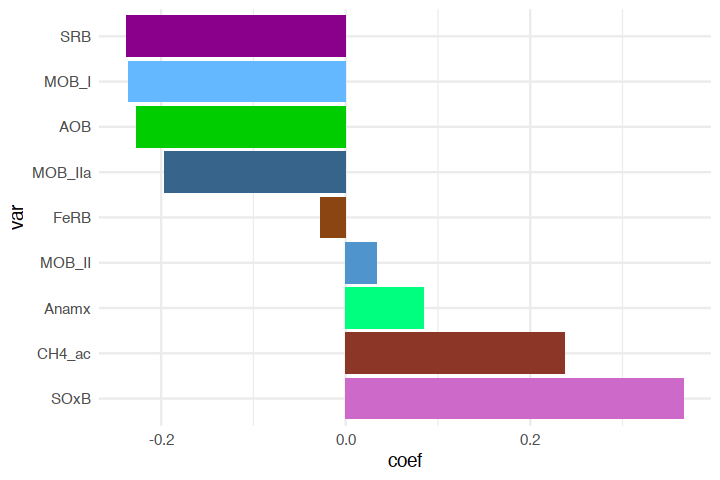

In [91]:
# Test without FeOB to see what the effect is (comment from Wyatt)
# Need to get this plot for guilds only, and then the genera in those guilds (Figure S10)
y_var <- 'CH4_logn1'
x_vars <- guild_vars$Guild[c(1,3:16)]

# Remove sample names
Guild_CH4_d0 <- Guild_CH4_d
row.names(Guild_CH4_d0) <- Guild_CH4_d0$Sample
Guild_CH4_d0 <- Guild_CH4_d0[,-1]
Guild_CH4_d0 <- Guild_CH4_d0 %>%
    select(-FeOB)
Guild_CH4_dS <- scale(Guild_CH4_d[,-1])              #  careful will scale y 
Guild_CH4_dS_df <- data.frame(Guild_CH4_dS)          #  make df
Guild_CH4_dS_df$CH4_logn1 <- Guild_CH4_d0$CH4_logn1  # fix CH4 scale to original
CH4_lass0 <- glmnet_lassoCV(y_var, x_vars, Guild_CH4_d0)
vars <- glmnet_coefs(CH4_lass0, output = 'vars')      # return only list of signif vars
vars
names(guild_colors_noFeOB)[1] <- "var"
CH4_lass0_cplot <- plot_lasso_coefs(CH4_lass0, guild_colors_noFeOB)
options(repr.plot.width=6, repr.plot.height=4)
CH4_lass0_cplot

## Figure 10b

In [24]:
Guild_CH4_d <- read.table("~/Documents/GitHub/SF_microbe_methane/data/SEM_data/SEM_base_log2_10_delta_guild_soil_data.txt")
dim(Guild_CH4_d)

[1] 65 51

In [25]:
# Now genera. Made table in other R Script (UpdatedCorrelationTables.R). Read in and merge by Sample ID
gen_tab <- read.table("~/Documents/GitHub/SF_microbe_methane/data/SEM_data/SEM_base_log2_10_delta_genera_soil_data.txt")
Guild_CH4_d <- Guild_CH4_d %>%
    left_join(., gen_tab, by = "Sample")

In [26]:
dim(Guild_CH4_d)

[1] 65 71

In [27]:
gen_guild <- read.table("~/Documents/GitHub/SF_microbe_methane/guild_analysis/Top20_SigGuild_Genera.txt", sep = "\t")
gen_guild

,Genus,Guild
,<chr>,<chr>
1,Crenothrix,MOB_I
2,Desulfatiglans,SRB
3,Desulfobacca,SRB
4,DesulfocapsaceaeFA,SRB
5,Desulfomonile,SRB
6,DesulfosarcinaceaeFA,SRB
7,DesulfuromonadaceaeFA,SRB
8,Ellin6067,AOB
9,GeobacteraceaeFA,FeRB


In [28]:
guild_colors <- guild_colors %>%
    left_join(., gen_guild, by = c("var" = "Guild"))

In [29]:
names(guild_colors) <- c("Guild", "Index", "color", "var")

[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1"
[1] "ran SEM to create models: sem.ch4_mod0, sem.ch4_mod0a.1"


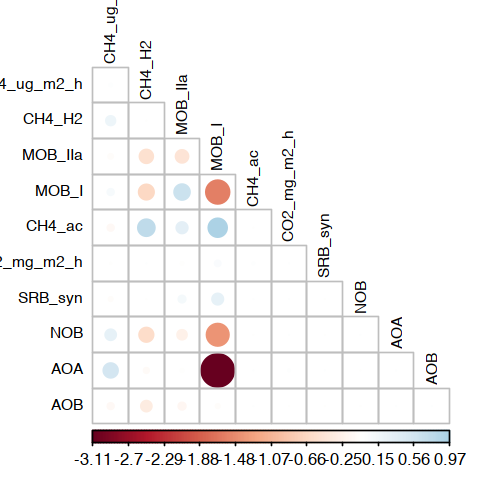

In [30]:
# Updated define_new_sem_table function
suppressWarnings(source('lasSEM_R_modules/lasSEM_3_SEM_basics_MI_COV_v1.12.R'))

In [31]:
source('lasSEM_R_modules/lasSEM_4_SEM_basics_example_v1.12.R')

In [32]:
names(Guild_CH4_d0)

[1] "CH4_ug_m2_h" "CH4_logn1"   "CO2_mg_m2_h" "CH4_CO2"     "Bulk_dens"  
 [6] "H2O_FPS"     "pH"          "C"           "N"           "P"          
[11] "CN"          "NP"          "NO3_N"       "NH4_N"       "Olsen_P"    
[16] "NP_ext"      "Salinity.x"  "Cl"          "SO4"         "SO4_pw"     
[21] "Fe"          "Fe_pw"       "DOC_mg_L"    "CH4_mix"     "CH4_H2"     
[26] "CH4_ac"      "CH4_me"      "MOB_I"       "MOB_II"      "MOB_IIa"    
[31] "ANME"        "AOA"         "AOB"         "NOB"         "Anamx"      
[36] "SOxB"        "SRB_syn"     "SRB"         "FeOB"        "FeRB"       
[41] "Actino"      "Chlorf"      "Firmic"      "AO_NOB"      "NOB_AO"     
[46] "mcr_pmo"     "pmo_mcr"     "CH4_all"     "CH4_ac_mix"  "MOB_all"

[1] "best_lambda: 0.0339"
     R2  RMSE
1 0.805 0.472


[1] "Desulfatiglans"     "Desulfobacca"       "Desulfomonile"     
 [4] "GeobacteraceaeFA"   "Leptolinea"         "Methyloceanibacter"
 [7] "Methylocystis"      "Methylotenera"      "Sva1033FA"         
[10] "Thiobacillus"

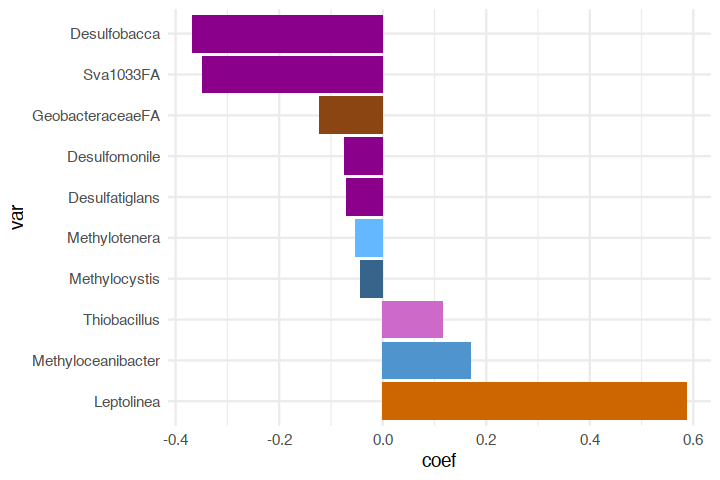

In [33]:
# Need to get this plot for top 20 genera in significant guilds
y_var <- 'CH4_logn1'
x_vars <- gen_guild$Genus

# Remove sample names
Guild_CH4_d0 <- Guild_CH4_d
row.names(Guild_CH4_d0) <- Guild_CH4_d0$Sample
Guild_CH4_d0 <- Guild_CH4_d0[,-1]

Guild_CH4_dS <- scale(Guild_CH4_d[,-1])              #  careful will scale y 
Guild_CH4_dS_df <- data.frame(Guild_CH4_dS)          #  make df
Guild_CH4_dS_df$CH4_logn1 <- Guild_CH4_d0$CH4_logn1  # fix CH4 scale to original
CH4_lass0 <- glmnet_lassoCV(y_var, x_vars, Guild_CH4_d0)
vars <- glmnet_coefs(CH4_lass0, output = 'vars')      # return only list of signif vars
vars
#names(guild_colors)[1] <- "var"
CH4_lass0_cplot <- plot_lasso_coefs(CH4_lass0, guild_colors)
options(repr.plot.width=6, repr.plot.height=4)
CH4_lass0_cplot

In [34]:
nrow(Guild_CH4_dS)

[1] 65

In [35]:
coefs <- glmnet_coefs(CH4_lass0)              # Get significant effects

In [36]:
coefs

,coef,var
,<dbl>,<chr>
Desulfatiglans,-0.06955841,Desulfatiglans
Desulfobacca,-0.36716834,Desulfobacca
Desulfomonile,-0.07358556,Desulfomonile
GeobacteraceaeFA,-0.12188126,GeobacteraceaeFA
Leptolinea,0.58619263,Leptolinea
Methyloceanibacter,0.16965120,Methyloceanibacter
Methylocystis,-0.04327680,Methylocystis
Methylotenera,-0.05301912,Methylotenera
Sva1033FA,-0.34716116,Sva1033FA


In [37]:
# merge w colors
coef_color <- data.frame(merge(coefs, guild_colors, all.x=T, by = 'var'))     # coef_color
colors2 <- as.character(coef_color$color)                               # only levels of var used  
colors2[is.na(colors2)] <- '#708090'                                    # replace NA color 
coef_color$color <- as.factor(colors2)                                  # replace colors (levels)

In [38]:
# reorder data / factors by coef
coef_color <- coef_color[order(coef_color$coef),]                       # sort by coef
coef_color$var <- reorder(coef_color$var, coef_color$coef)              # reorder var by coef
coef_color$color <- reorder(coef_color$color, coef_color$coef)          # reorder color by coef

In [39]:
coef_color

,var,coef,Guild,Index,color
,<fct>,<dbl>,<chr>,<dbl>,<fct>
2,Desulfobacca,-0.36716834,SRB,3,#8B008B
9,Sva1033FA,-0.34716116,SRB,3,#8B008B
4,GeobacteraceaeFA,-0.12188126,FeRB,1,#8B4513
3,Desulfomonile,-0.07358556,SRB,3,#8B008B
1,Desulfatiglans,-0.06955841,SRB,3,#8B008B
8,Methylotenera,-0.05301912,MOB_I,13,#63B8FF
7,Methylocystis,-0.04327680,MOB_IIa,11,#36648B
10,Thiobacillus,0.11621265,SOxB,5,#CD69C9
6,Methyloceanibacter,0.16965120,MOB_II,12,#4F94CD


In [40]:
guild_colors$var %in% coef_color$var

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[13]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
[25]  TRUE FALSE FALSE FALSE FALSE

In [41]:
guild_colors$var

[1] "GeobacteraceaeFA"         "Leptolinea"              
 [3] "Desulfatiglans"           "Desulfobacca"            
 [5] "DesulfocapsaceaeFA"       "Desulfomonile"           
 [7] "DesulfosarcinaceaeFA"     "DesulfuromonadaceaeFA"   
 [9] "Sva1033FA"                "ThermodesulfovibrioniaCL"
[11] NA                         "Rhodomicrobium"          
[13] "Thiobacillus"             NA                        
[15] NA                         "Ellin6067"               
[17] "GOUTA6"                   "MND1"                    
[19] NA                         NA                        
[21] "Methylocystis"            "Methyloceanibacter"      
[23] "MethyloligellaceaeFA"     "Crenothrix"              
[25] "Methylotenera"            NA                        
[27] NA                         NA                        
[29] NA

In [42]:
to_add <- as.data.frame(guild_colors$var) %>%
    set_names(c("var")) %>%
    filter(var %notin% coef_color$var) %>%
    filter(var != "NA")
to_add   

var
<chr>
DesulfocapsaceaeFA
DesulfosarcinaceaeFA
DesulfuromonadaceaeFA
ThermodesulfovibrioniaCL
Rhodomicrobium
Ellin6067
GOUTA6
MND1
MethyloligellaceaeFA


In [43]:
# Add non-sig guilds (n = 10)
coef_color <- coef_color %>%
  add_row(var = to_add$var[1], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[2], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[3], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[4], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[5], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[6], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[7], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[8], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[9], coef = 0, Index = 1, color = "white") %>%
  add_row(var = to_add$var[10], coef = 0, Index = 1, color = "white")

In [44]:
# reorder data / factors by coef
coef_color <- coef_color[order(coef_color$coef, decreasing = TRUE),]                       # sort by coef
coef_color$var <- reorder(coef_color$var, -coef_color$coef)              # reorder var by coef
coef_color$color <- reorder(coef_color$color, -coef_color$coef)          # reorder color by coef

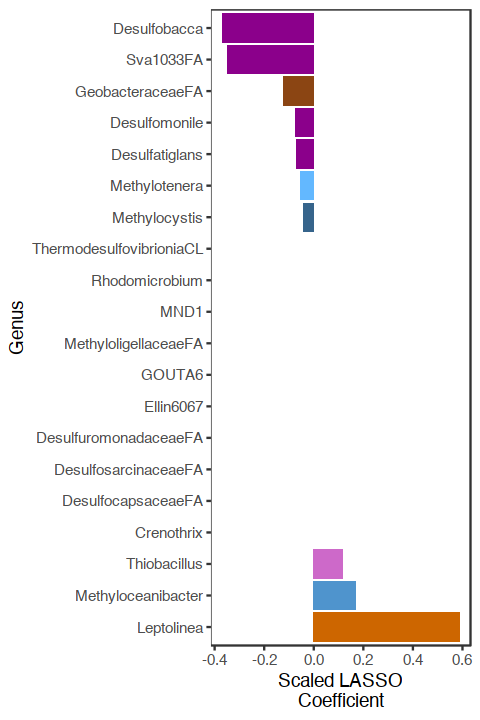

In [45]:
# Make ggplot
options(repr.plot.width = 4, repr.plot.height = 6)
plot_colors <- c(paste(coef_color$color))
figS10b <- ggplot(data = coef_color, aes(x = var, y = coef, fill = var)) +
    geom_bar(stat = "identity") + 
    scale_fill_manual(values = plot_colors) + 
    coord_flip() + 
    labs(y = "Scaled LASSO\nCoefficient",
         x = "Genus") +
    theme_bw() +
    theme(legend.position = "none",
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank())
figS10b

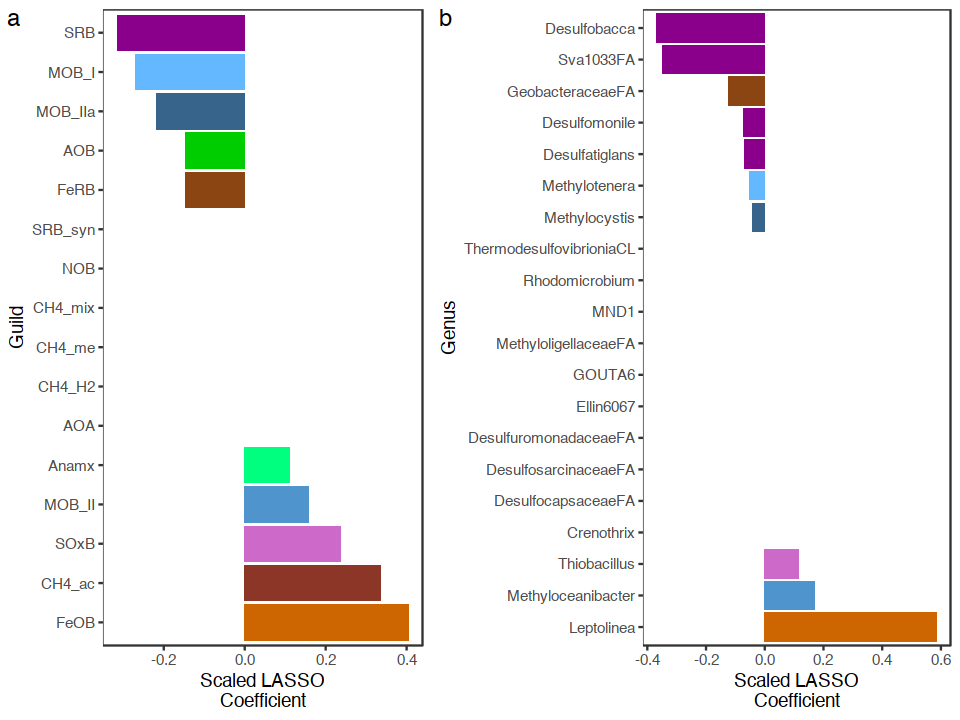

In [46]:
# Make multipanel plot S10
options(repr.plot.width = 8, repr.plot.height = 6)
figs10 <- plot_grid(figS10a, figS10b, rel_widths = c(0.45, 0.55), labels = "auto")
figs10
#pdf("~/Documents/GitHub/SF_microbe_methane/figs/FigureS10.pdf", width = 8, height = 6)
#figs10
#dev.off()

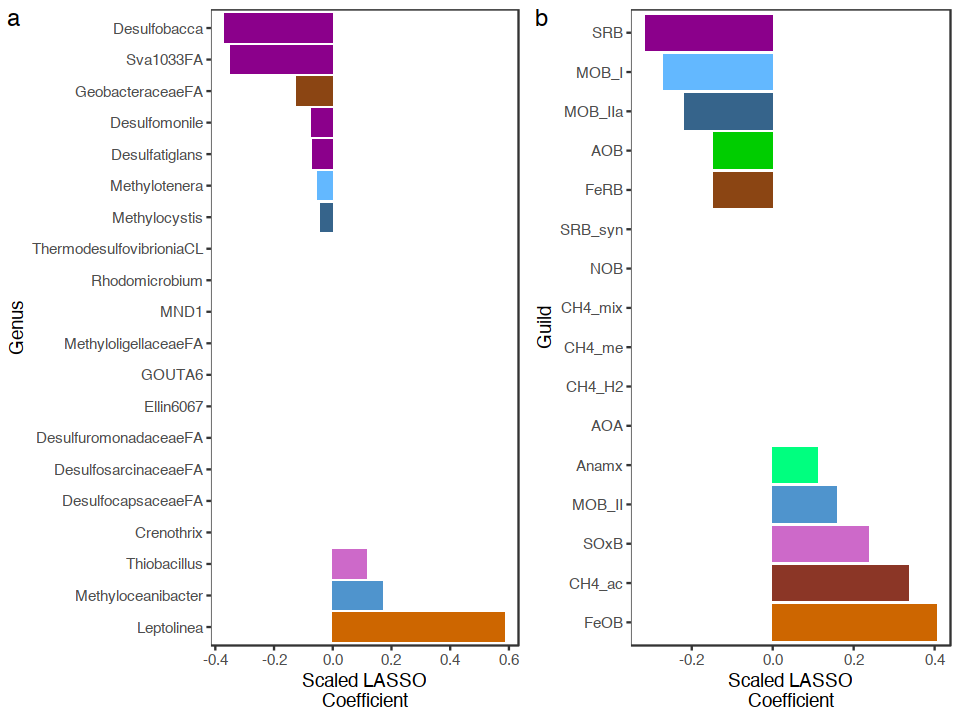

In [49]:
# Switch order of a and b to match text order
options(repr.plot.width = 8, repr.plot.height = 6)
figs10 <- plot_grid(figS10b, figS10a, rel_widths = c(0.55, 0.45), labels = "auto")
figs10
#pdf("~/Documents/GitHub/SF_microbe_methane/figs/FigureS10_ba.pdf", width = 8, height = 6)
#figs10
#dev.off()

# Continue Wyatt Script

In [91]:
# Filter step troubleshoot
# semF <-sem_filter(subs, data = Guild_CH4_dS_df, top_n_models = 140, sort_by = 'aic', n_mod_ret = 140)
# semF <-sem_filterP(subs, data = Guild_CH4_dS_df, top_n_models = 140, sort_by = 'aic', ncores = 20) # depricate , n_mod_ret = 140,  
#filt_models <- filter_byLM_resid(semF, n_keep_split = 3, R2_filter = 0.5, resid_0filter = TRUE)
# reduce candidate models by top n (subtests)
mod_cands <- subs[1:140,]                              # subset
mods <- mod_cands$model                                            # get models

In [92]:
# orig feats to keep 
keep_orig <- c("n_pred", "AIC", "BIC", "AICc")
orig_feats <- mod_cands[keep_orig]
names(orig_feats) <- c("n_pred","aic_glm","bic_glm","aicc_glm")
orig_feats$n_pred <- orig_feats$n_pred - 1                         # note init n_pred incl. y 

In [93]:
# Get performance metrics for each
mod_outs = {}

In [94]:
length(mods)

[1] 140

In [95]:
mods

[1] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + MOB_IIa + ANME + CH4_ac_mix"
  [2] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME + AOB"                 
  [3] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + MOB_IIa + ANME + CH4_ac_mix"         
  [4] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME"                       
  [5] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + ANME + CH4_ac_mix"              
  [6] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + ANME + AOB"                          
  [7] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_me + MOB_IIa + ANME"             
  [8] "CH4_logn1  ~  CO2_mg_m2_h + MOB_IIa + ANME + CH4_ac_mix"                     
  [9] "CH4_logn1  ~  CO2_mg_m2_h + CH4_ac + MOB_IIa + ANME"                         
 [10] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + MOB_IIa + CH4_ac_mix"           
 [11] "CH4_logn1  ~  CO2_mg_m2_h + ANME + AOB"                                      
 [12] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + MOB_IIa + CH4_ac_mix"       
 [13] "CH4_logn1  ~  CO2_mg_m2_h + CH4_me + MOB_IIa + ANME"                         
 [14] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + CH4_me + ANME"                  
 [15] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + CH4_me + MOB_IIa"           
 [16] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + ANME + CH4_ac_mix"                   
 [17] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + MOB_IIa + CH4_ac_mix"                
 [18] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_me + MOB_IIa + AOB"              
 [19] "CH4_logn1  ~  CO2_mg_m2_h + CH4_ac + ANME"                                   
 [20] "CH4_logn1  ~  CO2_mg_m2_h + pH + ANME + CH4_ac_mix"                          
 [21] "CH4_logn1  ~  CO2_mg_m2_h + H2O_FPS + ANME + CH4_ac_mix"                     
 [22] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_me + ANME"                       
 [23] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + MOB_IIa + AOB"              
 [24] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_me + MOB_IIa"                    
 [25] "CH4_logn1  ~  CO2_mg_m2_h + pH + CH4_me + ANME"                              
 [26] "CH4_logn1  ~  CO2_mg_m2_h + ANME + CH4_ac_mix"                               
 [27] "CH4_logn1  ~  CO2_mg_m2_h + CH4_me + ANME"                                   
 [28] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + MOB_IIa"                    
 [29] "CH4_logn1  ~  CO2_mg_m2_h + H2O_FPS + MOB_IIa + CH4_ac_mix"                  
 [30] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + AOB + CH4_ac_mix"               
 [31] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + MOB_IIa + AOB"                       
 [32] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + CH4_me + AOB"                   
 [33] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + CH4_ac + CH4_ac_mix"            
 [34] "CH4_logn1  ~  CO2_mg_m2_h + H2O_FPS + CH4_me + MOB_IIa"                      
 [35] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_ac + AOB"                        
 [36] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + CH4_ac + CH4_me"                
 [37] "CH4_logn1  ~  CO2_mg_m2_h + ANME"                                            
 [38] "CH4_logn1  ~  CO2_mg_m2_h + MOB_IIa + CH4_ac_mix"                            
 [39] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + CH4_me + AOB"                        
 [40] "CH4_logn1  ~  CO2_mg_m2_h + CH4_me + MOB_IIa"                                
 [41] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + CH4_ac_mix"                     
 [42] "CH4_logn1  ~  CO2_mg_m2_h + H2O_FPS + CH4_ac + MOB_IIa"                      
 [43] "CH4_logn1  ~  CO2_mg_m2_h + MOB_IIa + AOB"                                   
 [44] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + pH + CH4_ac"                         
 [45] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + H2O_FPS + CH4_ac + CH4_ac_mix"       
 [46] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + AOB"                                 
 [47] "CH4_logn1  ~  CO2_mg_m2_h + Bulk_dens + H2O_FPS + CH4_ac + CH4_me"           
 [48] "

In [96]:
# Looks like mod 140 with NA was causing errors. run 1:139
for (i in seq(1:139)){

    # Get SEM model
    form <- paste(mods[4])
    SEM_mod <- sem(form, data = data, fixed.x=FALSE, estimator = 'mlm', orthogonal = TRUE)
    
    # Get R2 data
    r2 <- get_SEM_R2s(SEM_mod)
    R2 <-r2[,1]
    
    # Get aic, bic data
    keep <- c('aic','bic','npar')
    fits <- sem_fit_sum(SEM_mod, sem_fit_params)
    fits <- fits[keep]
      
    # all feats significant?
    sig_test <- get_SEM_nonsig_vars(SEM_mod, p_cut =0.05)
    if (dim(sig_test)[1] == 0){
        all_sig <- 'yes'
        } else {
        all_sig <- 'no'
        }
        
    # get feats from original data
    keep_orig <- orig_feats[4,]        
                            
    # combine feats & assign to list
    out <- data.frame(fits, R2, form, all_sig, keep_orig)
    mod_outs[[4]] <- out #paste(mods[i])
    
    }

In [97]:
# Assemble and sort list
output <- data.frame(do.call(rbind, mod_outs))
output <- output[order(output['aic']),]
    
# clean and return output
model <- seq(1:(length(mods)))
output <- data.frame(model, output)
    
    
output <- output[output$all_sig == 'yes',]
output <- output[1:(139),]
output <- output[complete.cases(output),]
row.names(output) <- output$model
return(output)

Warning message in data.frame(model, output):
“row names were found from a short variable and have been discarded”


,model,aic,bic,npar,R2,form,all_sig,n_pred,aic_glm,bic_glm,aicc_glm
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
2,2,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
3,3,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
4,4,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
5,5,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
6,6,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
7,7,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
8,8,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
9,9,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656


In [98]:
semF <- output

In [99]:
# source('lasSEM_R_modules/lasSEM_5_ML_feat_sel_LAS_GLM_SEM_v1.12.R')   # slow examples

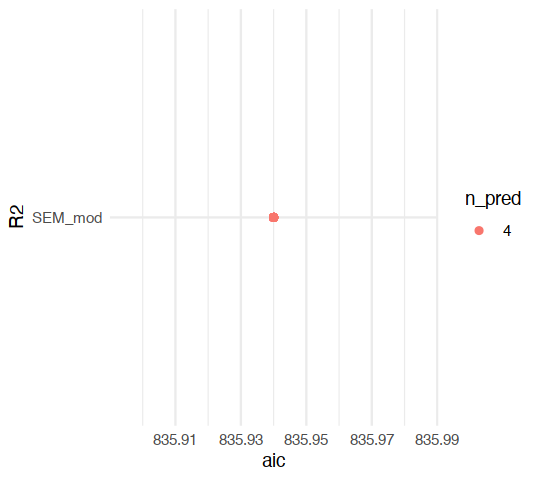

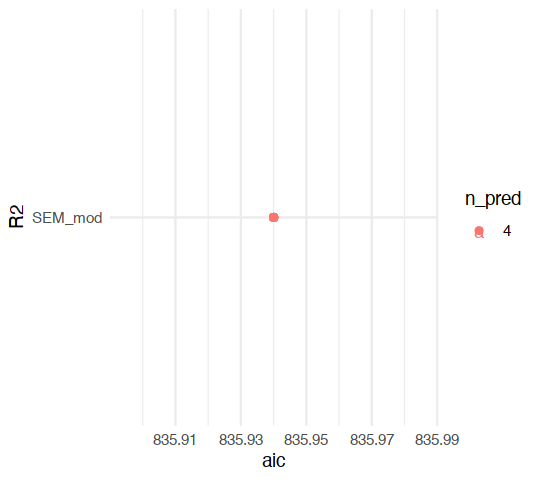

In [100]:
# HELPER fxn -- get ggplot color wheel hue function -- Maybe use later?
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = (n + 1))
  hcl(h = hues, l = 65, c = 100)[1:n]
}

########################################################################################
### a) plot SEM LASSO models
plot_SEM_lasso_mods = function(sem_tab, label = 'FALSE', colors = ''){
    
    
    # Get color palette, default or custom
    options(warn=-1)                                            # need to supress warning in this function
    if (colors == ''){                                          # if (colors warns for vector, not needed
          cols <- gg_color_hue(max(sem_tab$n_pred))} else {     # default ggplot colors  OR
          cols <- colors}                                       # custom color input     generated in combined plots  
    
    # Get n_pred as factor 
    sem_tab$n_pred <- factor(sem_tab$n_pred)
      
    # plot w/o labels
    no_lab <- ggplot(sem_tab, aes(x=aic, y=R2, color = n_pred)) + geom_point() +
                    theme_minimal() + scale_color_manual(values = cols) #+ 
                    #geom_smooth(method=lm, aes(fill = n_pred))
    
    # plot w labels
    label_plot <- ggplot(sem_tab, aes(x=aic, y=R2, color = n_pred, label = model)) + geom_point() +
                     geom_text_repel() + theme_minimal() + scale_color_manual(values = cols)
    
    # is plot labeled?
    if (label == 'FALSE'){
          out_plot <- no_lab} else {
          out_plot <- label_plot}
    
    return(out_plot)    
}

#head(asemF)

# Demonstrate function
all_models <- plot_SEM_lasso_mods(semF)
#all_models <- plot_SEM_lasso_mods(asemF)

options(repr.plot.width=4.5, repr.plot.height=4)
all_models

# With restricted input, labels  -- Incorporated into g) below
semF_top_n <- semF[order(semF$aic_glm),]
semF_top_n <- semF_top_n[1:25,]

# plot selected models
select_models <- plot_SEM_lasso_mods(semF_top_n, label = 'TRUE')
select_models

In [101]:
head(semF)

,model,aic,bic,npar,R2,form,all_sig,n_pred,aic_glm,bic_glm,aicc_glm
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
2,2,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
3,3,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
4,4,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
5,5,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656
6,6,835.94,868.555,15,SEM_mod,CH4_logn1 ~ CO2_mg_m2_h + Bulk_dens + CH4_ac + ANME,yes,4,80.86829,93.91461,82.31656


In [102]:
# Troubleshoot - issue is sel_models R2 just says 'SEM_mod'
# Demonstrate function
get_models <- c(34, 35, 67, 69, 82, 107, 113, 116) 
sel_models <- semF[semF$model %in% get_models,]

In [103]:
sel_models$aic

[1] 835.94 835.94 835.94 835.94 835.94 835.94 835.94 835.94

In [104]:
sel_models$R2

[1] "SEM_mod" "SEM_mod" "SEM_mod" "SEM_mod" "SEM_mod" "SEM_mod" "SEM_mod"
[8] "SEM_mod"

In [105]:
# params from selected
selected <- sel_models$model                                                                   # selected mods
x_min <- min(sel_models$aic)*0.9
y_min <- min(sel_models$R2)*0.9

ERROR: Error in min(sel_models$R2) * 0.9: non-numeric argument to binary operator


In [106]:
# suppressMessages(source('lasSEM_R_modules/lasSEM_6_Plot_LASSO_SEM_model_screening_v1.12.R'))

In [107]:
source('lasSEM_R_modules/lasSEM_7_SEM_model_VIP_sorting_v1.12.R')
#setwd('~/Desktop/Sal_SEM_models')

ERROR: Error in coef_sort_sem_form_tab(lasso_model, sel_models, sep_table = "TRUE", : object 'filt_models' not found


In [108]:
source('lasSEM_R_modules/lasSEM_8_SEM_model_selection_plot_components_heat_clust_v1.12.R')

ERROR: Error in as.matrix(x): object 'vip_matrix' not found


In [109]:
suppressMessages(source('lasSEM_R_modules/lasSEM_9_lasSEM_combined_model_selection_plots_v1.12.R'))

ERROR: Error in plot_sem_lasso_selected(sem_tab, sel_models): could not find function "plot_sem_lasso_selected"


In [110]:
suppressMessages(source('lasSEM_R_modules/lasSEM_10_lasSEM_combined_workflow_plot_wrappers_v1.12.R'))  # slow ex

[1] "best_lambda: 0.0339"
     R2  RMSE
1 0.805 0.472
[1] "best_lambda: 0.0339"
     R2  RMSE
1 0.805 0.472


ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [111]:
source('lasSEM_R_modules/lasSEM_11_SEM_autocompositing_v1.12.R')       # slow ex

ERROR: Error in file(file, "rt"): cannot open the connection


In [112]:
source('lasSEM_R_modules/lasSEM_12_SEM_branching_workflow_wrappers_v1.12.R')

In [113]:
# source('lasSEM_R_modules/ ')

In [114]:
# source('lasSEM_R_modules/ ')

# 2) user definitions for model inputs

### a) SEM model metrics to report

In [115]:
# need to verify that passing these variables is "open" where models run
# sem_fit_params <- c( "pvalue", "chisq", "df", "npar","aic", "bic", "gfi", "cfi", "rni", "rmsea", "srmr")

### b) variable subsets for gas, soils, guilds

In [116]:
# rename col to var
# names(guild_colors)[1] <- "var"
# colors <- guild_colors

In [117]:
guild_colors

Guild,Index,color,var
<chr>,<dbl>,<chr>,<chr>
FeRB,1,#8B4513,GeobacteraceaeFA
FeOB,2,#CD6600,Leptolinea
SRB,3,#8B008B,Desulfatiglans
SRB,3,#8B008B,Desulfobacca
SRB,3,#8B008B,DesulfocapsaceaeFA
SRB,3,#8B008B,Desulfomonile
SRB,3,#8B008B,DesulfosarcinaceaeFA
SRB,3,#8B008B,DesulfuromonadaceaeFA
SRB,3,#8B008B,Sva1033FA


### c) variable compositing rules

# 3) lasSEM model selection workflow for SEM branches/ leaves

## 0) Data preparation: scaling & var subsets

- Guild_CH4_dS  (delta, scaled)
- drop_x sets for: gas, ratios, pw, guilds, taxa  (extraneous guilds, etc)
- drop_vars1 = all drop_x's combined
- x_vars drops these from all vars, is base set (though note missing ratios, porewater)
- other x_var sets derived as needed

In [118]:
# Remove sample names
Guild_CH4_d0 <- Guild_CH4_d
row.names(Guild_CH4_d0) <- Guild_CH4_d0$Sample
Guild_CH4_d0 <- Guild_CH4_d0[,-1]

In [119]:
# SCALE ALL, needed for some functions (SEM screening)
Guild_CH4_dS <- scale(Guild_CH4_d0)              #  careful will scale y 
Guild_CH4_dS <- data.frame(Guild_CH4_dS)          #  make df
Guild_CH4_dS$CH4_logn1 <- Guild_CH4_d0$CH4_logn1  # fix CH4 scale to original

In [120]:
names(Guild_CH4_dS)


[1] "CH4_ug_m2_h"              "CH4_logn1"               
 [3] "CO2_mg_m2_h"              "CH4_CO2"                 
 [5] "Bulk_dens"                "H2O_FPS"                 
 [7] "pH"                       "C"                       
 [9] "N"                        "P"                       
[11] "CN"                       "NP"                      
[13] "NO3_N"                    "NH4_N"                   
[15] "Olsen_P"                  "NP_ext"                  
[17] "Salinity.x"               "Cl"                      
[19] "SO4"                      "SO4_pw"                  
[21] "Fe"                       "Fe_pw"                   
[23] "DOC_mg_L"                 "CH4_mix"                 
[25] "CH4_H2"                   "CH4_ac"                  
[27] "CH4_me"                   "MOB_I"                   
[29] "MOB_II"                   "MOB_IIa"                 
[31] "ANME"                     "AOA"                     
[33] "AOB"                      "NOB"                     
[35] "Anamx"                    "SOxB"                    
[37] "SRB_syn"                  "SRB"                     
[39] "FeOB"                     "FeRB"                    
[41] "Actino"                   "Chlorf"                  
[43] "Firmic"                   "AO_NOB"                  
[45] "NOB_AO"                   "mcr_pmo"                 
[47] "pmo_mcr"                  "CH4_all"                 
[49] "CH4_ac_mix"               "MOB_all"                 
[51] "Crenothrix"               "Desulfatiglans"          
[53] "Desulfobacca"             "DesulfocapsaceaeFA"      
[55] "Desulfomonile"            "DesulfosarcinaceaeFA"    
[57] "DesulfuromonadaceaeFA"    "Ellin6067"               
[59] "GeobacteraceaeFA"         "GOUTA6"                  
[61] "Leptolinea"               "Methyloceanibacter"      
[63] "Methylocystis"            "MethyloligellaceaeFA"    
[65] "Methylotenera"            "MND1"                    
[67] "Rhodomicrobium"           "Sva1033FA"               
[69] "ThermodesulfovibrioniaCL" "Thiobacillus"

In [121]:
# prepare variable SUBSETS 

# get all vars
xvars0 <-names(Guild_CH4_dS)

# vars to exclude (maybe)
drop_gas <- c('CH4_ug_m2_h', 'CH4_logn1', 'CH4_CO2', 'CO2_soilC_mg_g_d') # keep this: ,'CO2_mg_m2_h',
drop_ratios <- c('CN','CP','NP','NO3_NH4','NP_ext')
drop_pw <- c('SO4_pw','Fe_pw','Fe','DOC_mg_L')
drop_guilds <- c('SOxB','MeOB','FeOB','AO_NOB','NOB_AO','mcr_pmo', 'pmo_mcr','Anamx')
drop_taxa <- c('Actino','Chlorf','Firmic')

# Get combined drop lists
drop_vars1 <- c(drop_gas, drop_pw, drop_guilds, drop_taxa, drop_ratios)

In [122]:
# Select guild & chem data:                # Remove drop vars from list
xvars1 <- xvars0[!xvars0 %in% drop_vars1]

# alternately, may want only guild or chem data lists, including ALL

## a) CH4 model:  Base LASSO feature selection

- compare all vars, limited vars, force SO4, SRB

### i) select input data

y_var: 'CH4_logn1'; x_vars, x_vars0

In [123]:
# Def y var
y_var <- 'CH4_logn1'

In [124]:
# DEFINE various X data sets:

# Most VARS IN, no ratios etc.
x_vars <-xvars1                     # x_vars

# ALL VARS IN, w/ ratios, remove CH4 permutations
drop2 <- c(drop_gas, drop_pw)
#drop_2cl <- c(drop2, "Cl")                  # also drop Cl!

max_vars <- xvars0[!xvars0 %in% drop2]
#max_vars <- xvars0[!xvars0 %in% drop_2cl]   # also drop Cl!

x_vars0 <- max_vars                                  


In [125]:
x_vars0

[1] "CO2_mg_m2_h"              "Bulk_dens"               
 [3] "H2O_FPS"                  "pH"                      
 [5] "C"                        "N"                       
 [7] "P"                        "CN"                      
 [9] "NP"                       "NO3_N"                   
[11] "NH4_N"                    "Olsen_P"                 
[13] "NP_ext"                   "Salinity.x"              
[15] "Cl"                       "SO4"                     
[17] "CH4_mix"                  "CH4_H2"                  
[19] "CH4_ac"                   "CH4_me"                  
[21] "MOB_I"                    "MOB_II"                  
[23] "MOB_IIa"                  "ANME"                    
[25] "AOA"                      "AOB"                     
[27] "NOB"                      "Anamx"                   
[29] "SOxB"                     "SRB_syn"                 
[31] "SRB"                      "FeOB"                    
[33] "FeRB"                     "Actino"                  
[35] "Chlorf"                   "Firmic"                  
[37] "AO_NOB"                   "NOB_AO"                  
[39] "mcr_pmo"                  "pmo_mcr"                 
[41] "CH4_all"                  "CH4_ac_mix"              
[43] "MOB_all"                  "Crenothrix"              
[45] "Desulfatiglans"           "Desulfobacca"            
[47] "DesulfocapsaceaeFA"       "Desulfomonile"           
[49] "DesulfosarcinaceaeFA"     "DesulfuromonadaceaeFA"   
[51] "Ellin6067"                "GeobacteraceaeFA"        
[53] "GOUTA6"                   "Leptolinea"              
[55] "Methyloceanibacter"       "Methylocystis"           
[57] "MethyloligellaceaeFA"     "Methylotenera"           
[59] "MND1"                     "Rhodomicrobium"          
[61] "Sva1033FA"                "ThermodesulfovibrioniaCL"
[63] "Thiobacillus"

In [126]:
# x_CO2_C

### ii) create lasso objects, coef plots for diff scenarios

hard filter SO4, force in SRB 

In [127]:
# all vars with RATIOS, complete, nothing held back
CH4_delt_ALL <- lasso_mod_plot(y_var, x_vars0, Guild_CH4_dS, guild_colors, plot_title = 'CH4_delta: all vars')

# all vars
CH4_delt_all <- lasso_mod_plot(y_var, x_vars, Guild_CH4_dS, guild_colors, plot_title = 'CH4_delta: all vars')

# force in SO4
CH4_delt_fSO4 <- CH4_delt_all 

# force in SRB
CH4_delt_fSRB <- lasso_mod_plot(y_var, x_vars, Guild_CH4_dS, guild_colors, 
                             force_in = c('SRB'), plot_title = 'CH4_delta: force SRB')

# all vars
CH4_delt_fmobac <- lasso_mod_plot(y_var, x_vars, Guild_CH4_dS, guild_colors, 
                             force_in = c('MOB_IIa, CH4_ac'), plot_title = 'CH4_delta: all vars')


[1] "best_lambda: 0.0531"
   R2  RMSE
1 0.9 0.345
[1] "best_lambda: 0.0542"
     R2  RMSE
1 0.893 0.357
[1] "best_lambda: 0.0583"
     R2  RMSE
1 0.891 0.363
[1] "best_lambda: 0.0542"
     R2  RMSE
1 0.893 0.357


### iii) get SEM models, filtered, lists w plots

In [152]:
getwd()

[1] "/Users/cliftonbdemesquita/Documents/GitHub/SF_microbe_methane/SEM_code"

In [154]:
source('~/Documents/GitHub/SF_microbe_methane/SEM_code/lasSEM_R_modules/SEM - Lasso semi-auto for SF OTU guilds v1.12.R')

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [142]:
lasso_obj_to_sem_select_plots = function(lasso_obj, y_var, data, var_colors,
                                force_filt = '', hard_filter = TRUE, keep_any_all = "all",  # force_params 
                                nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,              # sem filts
                                heat_filt = 0.7, k_clusts = 3){                              # heatmap params
    
    # Get all sem models and LM resid filtered
    sem_models <- lasso_to_SEM_mods(lasso_obj, y_var, data, force_filt = force_filt, hard_filter = hard_filter)      
    filt_models <- filter_byLM_resid(sem_models, n_keep_split = nbest, R2_filter = keep_filt, 
                                     resid_0filter = resid_0filt)
    
    # Get composite model selection plot
    plot_title <- deparse(substitute(lasso_obj))
    lasso_mod <- lasso_obj$lasso_mod
    lasso_sel_sumplot <- plot_lasso_sem_models(lasso_mod, var_colors, sem_models, filt_models, 
                                           plot_title = plot_title, k_clusts = k_clusts, R2_filt = heat_filt) 
                                           #, rel_widths_main = c(4, 4.5, 4, .75, 4, 0.7))

    # VIP sort sem & filt models after plotting
    sem_models  <- sem_model_vip_sorter(lasso_mod, sem_models)     
    filt_models <- sem_model_vip_sorter(lasso_mod, filt_models)
    
    # Gather output components
    output = list()
    output$sem_models <- sem_models
    output$filt_models <- filt_models
    output$plot <- lasso_sel_sumplot
    
    #output <- lasso_sel_sumplot
    
    return(output)
    
}

In [155]:
lasso_to_SEM_mods = function(lasso_obj, y_var, data, n_cores = 20, 
            top_glm = '', p_cut = 0.05, sort_by = 'aic', GLM_print = FALSE,    # glm params - Default should suffice
            hard_filter = FALSE, force_filt = '', keep_any_all = "all") {      # var forcing params
                              
           
    # Get vars from lasso object
    lasso_vars <- lasso_obj$lasso_vars
    lasso_model <- lasso_obj$lasso_mod
    
    # GLM selection for ALL significant subsets
    glm_models <- all_subsets_whhP(y_var, lasso_vars, data, p_cut = p_cut, ncores = n_cores)
    
    
    # glm to SEM model pre-filters 
    if (force_filt == ''){hard_filter = FALSE}                                 # bypass hard filter if no filter vars
    
    if (hard_filter == TRUE){                                                  # keeps only models incl. listed vars
         names(glm_models)[5] <- "form"                                        # kludge- match hard filter to SEM fmt 
         glm_models <- keep_only_models(lasso_model, glm_models, force_filt = force_filt, all_any = keep_any_all)
         names(glm_models)[5] <- "model"}                                      # change back to orig 
     
    n_GLM <- dim(glm_models)[1]
    if (top_glm == ''){top_glm <- n_GLM}                                       # only top scoring models 

    
    # Get only significant SEM models                                  
    sem_models <- sem_filterP(glm_models, data = data, sort_by = sort_by, 
                              top_n_models = top_glm, ncores = n_cores)        # n_mod_ret = top_glm,
       
    # Print n sig vars?
    if (GLM_print == TRUE) {
        print(paste0(n_GLM, ' sig models'))}  
    
    return(sem_models)

}

In [156]:
keep_only_models = function(lasso_model, sem_models, force_filt, all_any = "all" ){    

    # Get matrix data from models: fits/forms (coef_tab) & vars included in models (model_matrix)
    coef_tab <- coef_sort_sem_form_tab(lasso_model, sem_models, sep_table = 'TRUE', fxn_operator = '~ ')  # VIP sorted sem_models, TF enc
    model_matrix <-sort_sem_model_coef_mtx(lasso_model, sem_models, color_var = "n_pred")                                       # vars only VIP sorted, 01 enc 

    # Get forced vars
    force_n <-length(force_filt)                                          # get n vars forced
    if(all_any == "any"){force_n <-1}                                     # override n vars forced for "any"

    if (force_n ==1){                                                     # kludge for force_n = 1, for indexing & rowSums
        force_mtx <- model_matrix[force_filt]                             # get forced cols (binary T,F as 1,0)                      
        force_mtx$blank <- 0}   
        else {force_mtx <- model_matrix[,force_filt]}                     # get forced cols (binary T,F as 1,0) 
  
    # models to keep & their fit/formula data 
    keep_models <- row.names(force_mtx[rowSums(force_mtx) == force_n, ])  # get models passing (n TRUE = sum (0,1) = force n)
    filtered_mods <- coef_tab[coef_tab$form %in% keep_models,]            # get all data for these models

    # clean up/out variable matrix cols from data
    vars <- names(model_matrix)                                           # get vars in all models 
    scores <- names(coef_tab)                                             # get all model report cols
    keep_scores <- scores[!scores %in% vars]                              # get model scoring & formula cols (no var cols)
    filtered_out <- filtered_mods[keep_scores]                            # get model scores & formula data  (no var cols)

    return(filtered_out)
    
    #model_matrix; #force_mtx; #force_n; #keep_models
}

In [146]:
sem_filterP = function(subsets, data, top_n_models = 25, sort_by = 'bic', ncores = 20){       # n_mod_ret = 10, 
    
    # reduce candidate models by top n (subtests)
    mod_cands <- subsets[1:top_n_models,]                              # subset
    mods <- mod_cands$model                                            # get models
    
    # orig feats to keep 
    keep_orig <- c("model","n_pred", "AIC", "BIC", "AICc")
    orig_feats <- data.frame(mod_cands[keep_orig])
    names(orig_feats) <- c('model',"n_pred","aic_glm","bic_glm","aicc_glm")
    orig_feats$n_pred <- orig_feats$n_pred - 1                         # note init n_pred incl. y 
   
    # Get performance metrics for each
    mod_outs <- mclapply(mods, function(x){

        # Get SEM model
        form <- paste(x)
        SEM_mod <- sem(form, data = data, fixed.x=FALSE, estimator = 'mlm', orthogonal = TRUE)
    
        # Get R2 data
        r2 <- get_SEM_R2s(SEM_mod)
        R2 <-r2[,2]
    
        # Get aic, bic data
        keep <- c('aic','bic','npar')
        fits <- sem_fit_sum(SEM_mod, sem_fit_params)
        fits <- fits[keep]
      
        # all feats significant?
        sig_test <- get_SEM_nonsig_vars(SEM_mod, p_cut =0.05)
        if (dim(sig_test)[1] == 0){
            all_sig <- 'yes'
            } else {
            all_sig <- 'no'
            }
        
        # get feats from original data   
        keep_orig <- orig_feats[orig_feats$model == x,]  
        keep_orig <- keep_orig[,-1]
        
        # combine feats & assign to list
        data.frame(fits, R2, form, all_sig, keep_orig)

        }, mc.cores = ncores)

    # Assemble and sort list
    output <- data.frame(do.call(rbind, mod_outs))
    # output <- data.frame(rbindlist(mod_outs))         - rbindlist abandoned, no speedup & crash on NA
    output <- output[order(output[sort_by]),]
    
    # clean and return output
    model <- seq(1:(length(mods)))
    output <- data.frame(model, output)
    output <- output[output$all_sig == 'yes',]
    #output <- output[1:(n_mod_ret),]
    output <- output[complete.cases(output),]
    output <- data.frame(output)
    row.names(output) <- output$model
    
    # make cols numeric, fix forms       
    output2 <- data.frame(sapply(output, as.numeric))
    output2$form <-output$form
    
    return(output2)
    
}

In [158]:
get_SEM_nonsig_vars = function(sem_mod, p_cut) {

    # get significant only 
    sem_params <- parameterEstimates(sem_mod)                          # Get estimates
    sem_params_bad <- sem_params[sem_params$pvalue > p_cut,]           # cut out significant

    # clean up
    keep <- c('lhs', 'op','rhs','pvalue')                              # params to keep
    sem_params_bad <- sem_params_bad[keep]                             # keep
    sem_params_bad$pvalue <- round(sem_params_bad$pvalue, 2)           #  round p value
    sem_params_bad <- sem_params_bad[complete.cases(sem_params_bad),]  # drop all NA values (comes up in latent mods)
    sem_params_bad <- sem_params_bad[!sem_params_bad$op == "~~",]       # drop covariate fails 
    
    return(sem_params_bad)
    
}

In [157]:
sem_fit_sum = function(sem_mod, sem_fit_params) {
    
    sem_name <- paste(as.character(deparse(substitute(sem_mod))))
    model <- data.frame(model = sem_name)
    
    fits <- data.frame(fitMeasures(sem_mod, sem_fit_params))
    fits <- round(fits, digits = 3)
    out <- t(fits)
    
    out <- data.frame(model, out)
    row.names(out) <-NULL
   # names(out)[1] <- sem_name
    return(out)
    
    
}


In [148]:
filter_byLM_resid = function(sem_tab, n_keep_split = 4, sort_by = "resid", split_by = "n_pred",
#filter_lSEM_tab = function(sem_tab, n_keep_split = 4, sort_by = "resid", split_by = "n_pred",
                             R2_filter = 0, resid_0filter = TRUE){

    # get linear model & add residuals to table
    lm <- lm(R2 ~ aic, data = sem_tab)
    resid <- round(resid(lm),3)
    sem_tab$resid <- unlist(resid)

    # sort, split, and filter list
    sem_tab <- sem_tab[order(-sem_tab[,sort_by]),]
    sem_tab_split <- split(sem_tab, sem_tab[,split_by])

    filtered_list <- lapply(sem_tab_split, function(x) {head(x, n_keep_split)}) 
    sem_tab_filt <- rbindlist(rev(filtered_list))

    if (resid_0filter == TRUE) {
        out_tab <- sem_tab_filt[sem_tab_filt$resid > 0,]
        } else {out_tab <- sem_tab_filt}
    
    out_tab <- data.frame(out_tab[out_tab$R2 > R2_filter])
    out_tab
    
    }

In [150]:
plot_lasso_sem_models = function(lasso_model, group_colors, sem_tab, filt_models, plot_title = '',
                                k_clusts = 3, R2_filt = 0, alt_metric = resid, 
                                rel_widths_main = c(4, 4.5, 4, .75, 4, 0.6)){
    
    # get lasso & sem model plots
    lasSem <- plot_lasso_semfilt_list(lasso_model, group_colors, sem_tab, filt_models)
    coef <- lasSem$coef_plot 
    sems <- lasSem$models_plot
    filt <- lasSem$selected_plot
    
    # filter & sort data for heatmaps #
    filt_models <- filt_models[filt_models$R2 > R2_filt, ]              # keep only models > R2_filt
    matrix <- sort_sem_model_coef_mtx(lasso_model, filt_models)          # get formulas as binary by var
    vip_matrix <- vip_sort_sem_models(lasso_model, matrix)              # sort formulas by lasso VIP rank
    
    
    # get heatmap components
    tree <- model_cluster_dend(vip_matrix, k_clusts = k_clusts)         # get dendogram
    heats <- combine_model_heatmaps_list(lasso_model, filt_models, vip_matrix,   # get heatmaps  
                alt_metric = "resid", legend_row = 2, legend_col = 1)  
    R2 <- heats$R2_plot
    res <- heats$alt_plot
    leg <- heats$legends #+ legend.text=element_text(size=6)

    # get all plots, no legends
    p1 <- plot_grid(coef, sems, filt, tree, R2, res, nrow = 1, ncol =6, 
                      labels = c('A', 'B', 'C', 'D', '',''),
                      align = 'h', rel_widths = rel_widths_main)
    
    # kludge to fit legends without smashing together (not same scale as other plots)
    p2 <- plot_grid(p1, leg, nrow =1, ncol = 2, rel_widths = c(10,1.5))
    
    # add plot title
    title = paste0('    ', plot_title)
    p2 + draw_figure_label(label = title, size = 14, fontface = "bold") 
    
}

In [159]:
sort_sem_model_coef_mtx = function(lasso_model, sel_models, VIP_sort = TRUE, rev_order = TRUE, color_var = "R2"){
   
    # sorts sem formula table rows by variables & their lasso VIP (for sem model trees, or heatmaps)
    
    ### replace T/F var columns with data (color_var) ###
    # get table of vars encoded as T/F, with other model scoring data
    coef_tab <- coef_sort_sem_form_tab(lasso_model, sel_models, sep_table = 'TRUE', fxn_operator = '~ ') 
   
    # Get T/F variable sets for apply:
    coef_cols <- names(coef_tab)                                 # all columns
    logic_cols_test <- unlist(lapply(coef_tab, is.logical))      # which are T/F
    log_cols <- coef_cols[logic_cols_test]                       # get vect ot T/F columns only 
 
    # Apply TF replace function to logical, passing others 
    var_col_list = {}                                            # empty list
    for (i in log_cols)                                          # for each T/F col 
        var_col_list[[i]] <- TF_replace(coef_tab, i, color_var)  # insert val or 0 -- HELPER TF_replace row-wise
    
    # Make DF with binary data
    coef_tab2 <- data.frame(var_col_list)                        # replace log cols in orig data
    row.names(coef_tab2) <- coef_tab$form                        # get row names as formulas
    
    # all vars 1, for VIP sort OR R2 instead of sort             # VIP = lasso var imp = scaled coefs 
    if (VIP_sort == TRUE) {
        coef_tab2[!coef_tab2== 0] <- 1}                          # all vars T = 1, else 0 
        else {}                                                  # else T = R2 for heatmap, breaks VIP sort
    
    ### Sort models by vars included, by lasso VIP rank ###
    n_col <- dim(coef_tab2)[2]                                   # get number of columns
    col_nos <- seq(1:n_col)                                      # get vector of col_nos
    coef_tab2 <- dfOrder(coef_tab2, col_nos)                     # sort rows by all columns, in order of columns 
    
    if (rev_order == TRUE){
        coef_tab2 <- coef_tab2[rev(seq_len(nrow(coef_tab2))),]}  # reverse row order
        else{}
    
    return(coef_tab2)

}

In [160]:
sem_model_vip_sorter = function(lasso_model, filt_models, color_var = 'n_pred'){
    
    
  ### 1) Get data needed from existing functions ###                                       # likely could more gracefully refactor
    # VIP sort formulas & rows into matrix
    matrix <- sort_sem_model_coef_mtx(lasso_model, filt_models, color_var = color_var)     # VIP formulas matrix   
    vip_matrix <- vip_sort_sem_models(lasso_model, matrix)                                 # VIP sort model rows  
    
    
  ### 2) Patch sem_table columns / values to align with VIP sorted ### 
    # Get all data with TF columns per var (unsorted)
    model_tab <- coef_sort_sem_form_tab(lasso_model, filt_models, sep_table = 'TRUE', fxn_operator = '~ ')

    # Apply TF replace function to logical columns, here
    log_cols <- names(vip_matrix)                                # get logical columns, here from VIP matrix ! 
    var_col_list = {}                                            # empty list
    for (i in log_cols)                                          # for each T/F col 
        var_col_list[[i]] <- TF_replace(model_tab, i, color_var) # insert val or 0 -- HELPER TF_replace row-wise
    
    # Get dataframe of vars, make binary                         # TF replace set up to fill from rows, modify  
    var_cols_mtx <- data.frame(var_col_list)                     # insert TF replace into DF 
    var_cols_mtx[!var_cols_mtx == 0] <-1                         # replace all !=0 w 1 
    
    # replace TF vars in model tab w binary
    model_tab[log_cols] <-var_cols_mtx                           # replace logical columns in model table  
 
    
  ### 3) Merge, sort & clean models sorted by VIP ###
    # prepare VIP matrix for merge
    vip_matrix[!vip_matrix == 0] <- 1                                            
    vip_matrix$vip_indx <- seq(1:nrow(vip_matrix))
       
    # merge model_tab & vip matrix
    combined_matrix <- merge(model_tab, vip_matrix, by = log_cols)
    combined_matrix <- combined_matrix[order(combined_matrix$vip_indx),]
    
    # drop var sorting cols, finalize table
    all_cols <- names(combined_matrix)
    keep_cols <- all_cols[!all_cols %in% log_cols]
    out_model_table <- combined_matrix[keep_cols]
    
    out_model_table
    
}

In [161]:
vip_sort_sem_models = function(lasso_model, sem_model_matrix){
    
    # get coef weights from lasso
    coefs <- glmnet_coefs(lasso_model)                      # return only list of signif vars
    vars <- unlist(names(sem_model_matrix))                 # get var names 
    new_matrix <- sem_model_matrix                          # new matrix copy 

    # fill in lasso VIP coef weights for each time var included
    for (i in vars){                                            # for each var 
        value <- coefs[coefs$var == i, 1]                       # get coef
        new_matrix[i] <- ifelse(!sem_model_matrix[i]==0, value, 0)}        # if matrix = 1, coef, else 0
    
    return(new_matrix)
}

In [163]:
plot_sem_lasso_selected = function(all_sem, sel_sem, x_pad = 0.9, y_pad = 0.9){
    
    # params from selected
    selected <- sel_sem$model                                                                   # selected mods
    x_min <- min(sel_sem$aic)*x_pad
    y_min <- min(sel_sem$R2)*y_pad
    
    # recode selected feats in all DF
    all_sem$selected <- ifelse(all_sem$model %in% selected, "true", "false")                    # code selected
    all_sem$predictors <- as.factor(ifelse(all_sem$selected == 'true', "true", all_sem$n_pred)) # recode n_pred
    all_sem$sel_lab <- ifelse(all_sem$selected == 'true', all_sem$model, "")                    # label selected 

    # Get colors for plot
    n_cols <- length(unique(all_sem$n_pred))     # n pred
    cols0 <- gg_color_hue(n_cols)                # gg pal
    cols <- c(cols0, '#000000')                  # add black for selected 

    # plot data
    ggplot(all_sem, aes(x=aic, y=R2, color = predictors, label = sel_lab)) +
        geom_point(aes(shape=selected))  + theme_minimal() + geom_text_repel() + 
        scale_shape_manual(values = c(1, 19)) + scale_color_manual(values = cols) + 
        ylim(y_min, NA) + xlim(x_min, NA)
    
}

In [165]:
sem_model_feats_heatmap = function(lasso_model, filt_models, vip_matrix, color_var = "R2", high_col, low_col){

    # Get R2 matrix data
    R2_matrix <-sort_sem_model_coef_mtx(lasso_model, filt_models, VIP_sort = F) 
    R2_matrix <- data.frame(R2_matrix)
    R2_matrix$form <- row.names(R2_matrix)
    R2_vars <- c(unlist(names(R2_matrix)))                    # get list of vars in R2 data                       

    # replace orignal filt models data w R2 matrix
    in_mods_sorted <- sem_model_vip_sorter(lasso_model, filt_models)  # using new wrapper fxn
    mod_coef_tab <- merge(in_mods_sorted, R2_matrix, by="form")
    row.names(mod_coef_tab) <- mod_coef_tab$form              # make form row names (for sort by VIP)

    # Sort R2 by VIP model ordering 
    vip_rows <- c(unlist(row.names(vip_matrix)))              # Get VIP ordered models
    mod_coef_tab <- mod_coef_tab[vip_rows,]                   # sort coef data by VIP order

    # Get keep vars from mod coef table
    if(color_var == "R2"){                                    # if R2, get all R2 vars w. data from R2 matrix
        keep_cols <- R2_vars}
        else {keep_cols <- color_var}
    
    keep_vars <- c("model", keep_cols)                        # keep model NUMBER for ggplot, heat data 
    gg_data <- mod_coef_tab[,keep_vars]                       # get ggplot data

    # make model number factor for plotting
    gg_data$model <- as.factor(as.character(gg_data$model)) 

    # Get row ordering as model number for sorting melted 
    sort_mods <- unlist(as.character(paste(gg_data$model)))   # get sorted model numbers, still factor, pass to numeric
    sort_mods <- as.character(as.numeric(sort_mods))          # make char again (probably too many conv) 

    # melt data & reorder levels of model number factor in melted
    gg_data_m <- suppressMessages(melt(gg_data))              # Melt data
    
    gg_data_m$model <- as.factor(as.character(gg_data_m$model))
    gg_data_m$model <- reorder(gg_data_m$model, new.order = rev(sort_mods))    
    gg_data_m[gg_data_m == 0] <-NA                            # clean data for ggplot, 0 <- NA for blank
    #gg_data_m$variable <- strtrim(vars, 9)                   # trim var names, fails due to factor ordering 
    

    # plot data 
    plot <- ggplot(data = gg_data_m, aes(y=model, x=variable, fill=value)) + 
          geom_tile(color="white") +  scale_fill_gradient(na.value = "white", high = high_col, low = low_col) +             
          theme_minimal() + 
          theme(axis.text.x = element_text(angle = 45, hjust = 0), axis.title.x = element_blank(), axis.title.y = element_blank()) + 
          scale_x_discrete(position = "top") +
          labs(fill = color_var) #+ theme(legend.position = "bottom")
 
    plot
    
    #mod_coef_tab
    #gg_data
}

In [166]:
# all vars
CH4_delt_all_sem <- lasso_obj_to_sem_select_plots(CH4_delt_all, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.7, k_clusts = 3)

# ALL vars w/ ratios, taxa (min call)
CH4_delt_ALL_sem <- lasso_obj_to_sem_select_plots(CH4_delt_ALL, 'CH4_logn1', Guild_CH4_dS, guild_colors)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



In [167]:
# forced SO4
CH4_delt_fSO4_sem <- lasso_obj_to_sem_select_plots(CH4_delt_fSO4, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         force_filt = 'SO4', nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.7, k_clusts = 3)

ERROR: Error in `[.data.frame`(model_matrix, force_filt): undefined columns selected


In [168]:
# forced SRB
CH4_delt_fSRB_sem <- lasso_obj_to_sem_select_plots(CH4_delt_fSRB, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         force_filt = 'SRB', nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.7, k_clusts = 3)

                                         # see more models   
                                         #force_filt = 'SRB', nbest = 5, keep_filt = 0.5, resid_0filt = FALSE,  # sem filts
                                         #heat_filt = 0.5, k_clusts = 5)

`geom_smooth()` using formula 'y ~ x'



In [169]:
# forced SRB
CH4_delt_f_mobac_sem <- lasso_obj_to_sem_select_plots(CH4_delt_fmobac, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         force_filt = c('MOB_IIa','CH4_ac'), nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.7, k_clusts = 3)

ERROR: Error in `[.data.frame`(model_matrix, , force_filt): undefined columns selected


### iv) get model comparison plots

In [170]:
options(repr.plot.width=12, repr.plot.height= 3) # plot dims for combined plots

In [171]:
# CH4_delt_all_sem$plot

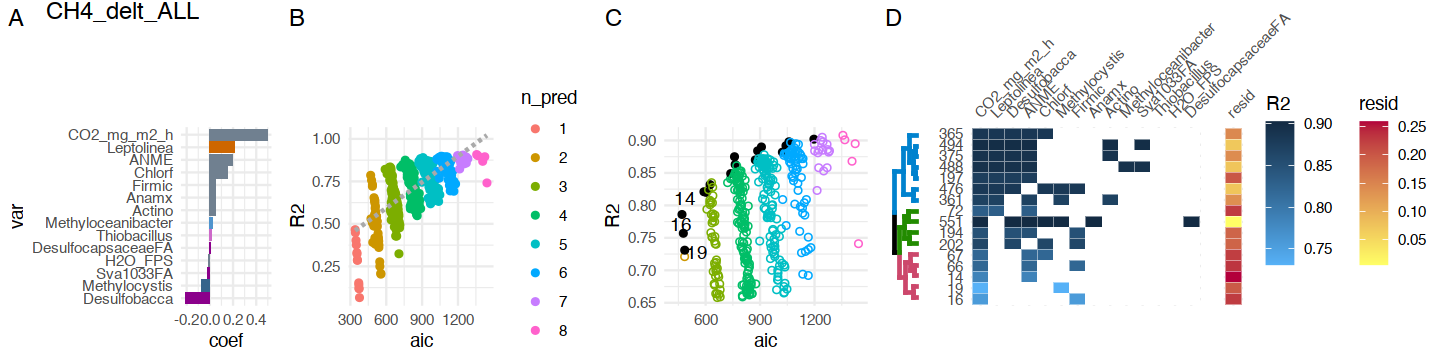

ERROR: Error in eval(expr, envir, enclos): object 'CH4_delt_fSO4_sem' not found


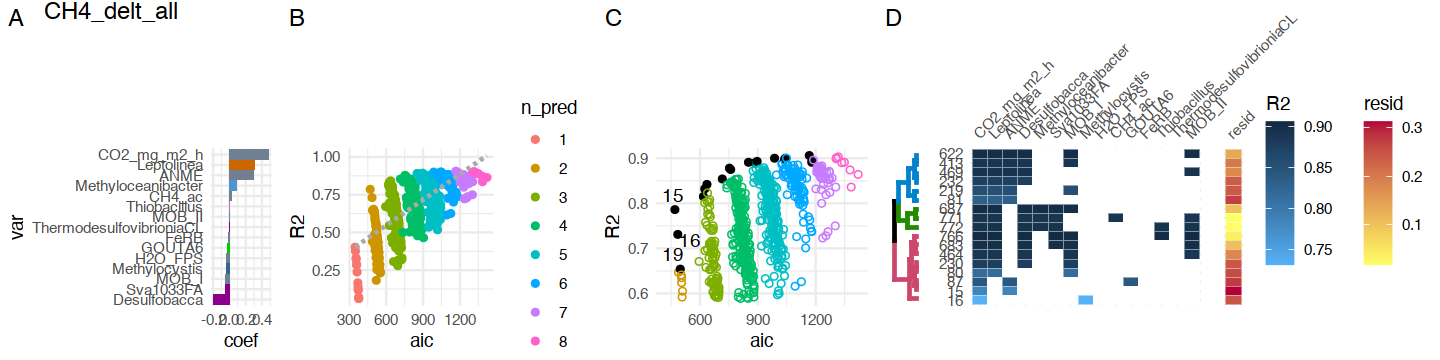

In [172]:
options(repr.plot.width=12, repr.plot.height= 3) # plot dims for combined plots

CH4_delt_ALL_sem$plot
CH4_delt_all_sem$plot
CH4_delt_fSO4_sem$plot
CH4_delt_fSRB_sem$plot 

In [173]:
CH4_delt_f_mobac_sem$plot

ERROR: Error in eval(expr, envir, enclos): object 'CH4_delt_f_mobac_sem' not found


## b) CH4 model: No CO2 and CO2/C models 

### i) select input data

y_var: 'CH4_logn1'; x_vars, x_vars0, x_noCO2, x_CO2_C 

In [174]:
# Def y var
y_var <- 'CH4_logn1'

In [175]:
# DEFINE various X data sets:

# Most VARS IN, no ratios etc.
#x_vars <-xvars1                     # x_vars

# ALL VARS IN, w/ ratios, remove CH4 permutations
#max_vars <- xvars0[!xvars0 %in% drop_gas]
#x_vars0 <- max_vars                                  

# no CO2
CO2 <- 'CO2_mg_m2_h'
x_noCO2 <- x_vars[!x_vars %in% CO2]

# no CO2.2 - drop MOBII, wrong weight
x_noCO2.2 <- drop_from_list('MOB_II', x_noCO2)

# replace CO2 w CO2_C
x_CO2_C <- c(x_noCO2, 'CO2_soilC_mg_g_d')

### ii) create lasso objects, coef plots for diff scenarios

hard filter SO4, force in SRB 

In [176]:
options(repr.plot.width=4, repr.plot.height= 3)  # plot dims for coeff plots

In [177]:
# no CO2
CH4_delt_xCO2 <- lasso_mod_plot(y_var, x_noCO2, Guild_CH4_dS, guild_colors, plot_title = 'CH4_delta: noCO2')

# no CO2.2 -- drop MOBII
CH4_delt_xCO2.2 <- lasso_mod_plot(y_var, x_noCO2.2, Guild_CH4_dS, guild_colors, plot_title = 'CH4_delta: noCO2')

# CO2/C instead of CO2
CH4_delt_CO2C <- lasso_mod_plot(y_var, x_CO2_C, Guild_CH4_dS, guild_colors, plot_title = 'CH4_delta: CO2/C')

[1] "best_lambda: 0.0524"
     R2  RMSE
1 0.815 0.465
[1] "best_lambda: 0.0524"
     R2  RMSE
1 0.814 0.466


ERROR: Error in `[.data.frame`(data, x_vars): undefined columns selected


### iii) get SEM models, filtered, lists w plots)

In [178]:
# no CO2 - had to drop heat filt down to 0.65, NO resid filter!
CH4_delt_xCO2_sem <- lasso_obj_to_sem_select_plots(CH4_delt_xCO2, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = FALSE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)

# no CO2.2 - had to drop heat filt down to 0.65
CH4_delt_xCO2.2_sem <- lasso_obj_to_sem_select_plots(CH4_delt_xCO2.2, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = FALSE,  # sem filts
                                         heat_filt = 0.5, k_clusts = 4)

# CO2/C
CH4_delt_CO2C_sem <- lasso_obj_to_sem_select_plots(CH4_delt_CO2C, 'CH4_logn1', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.7, k_clusts = 4)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



ERROR: Error in lasso_to_SEM_mods(lasso_obj, y_var, data, force_filt = force_filt, : object 'CH4_delt_CO2C' not found


### iv) get model comparison plots

In [179]:
options(repr.plot.width=12, repr.plot.height= 3) # plot dims for combined plots

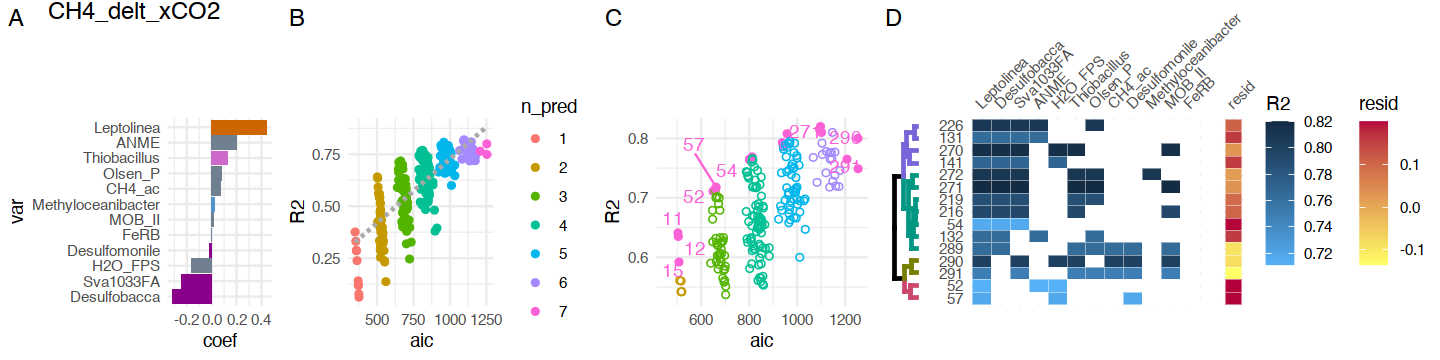

ERROR: Error in eval(expr, envir, enclos): object 'CH4_delt_CO2C_sem' not found


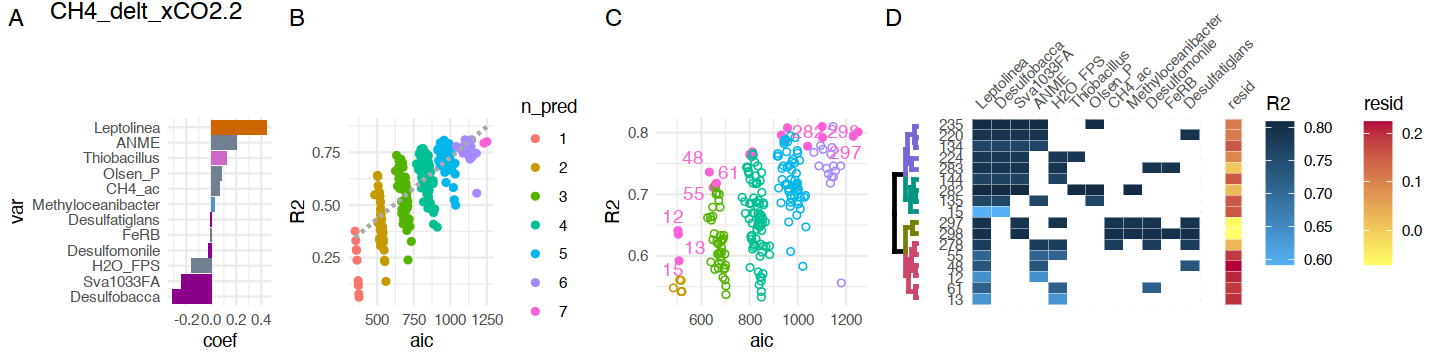

In [180]:
# CH4_delt_ALL_sem$plot
CH4_delt_xCO2_sem$plot
CH4_delt_xCO2.2_sem$plot 
CH4_delt_CO2C_sem$plot 

## c) MOB_IIa models: LASSO feature selection

### i) select input data

y_var = 'MOB_IIa'

- x_MOBIIa.3  (removed other guilds, see also .1-2) 
- x_MOBIIa.4  (removed N, C, P, dominating w/o mech)

In [181]:
#x_vars <- x_vars[!x_vars %in% 'Cl']   # DROP Cl
#x_vars <- x_vars[!x_vars %in% 'Salinity.x']   # DROP Cl
x_vars

[1] "CO2_mg_m2_h"              "Bulk_dens"               
 [3] "H2O_FPS"                  "pH"                      
 [5] "C"                        "N"                       
 [7] "P"                        "NO3_N"                   
 [9] "NH4_N"                    "Olsen_P"                 
[11] "Salinity.x"               "Cl"                      
[13] "SO4"                      "CH4_mix"                 
[15] "CH4_H2"                   "CH4_ac"                  
[17] "CH4_me"                   "MOB_I"                   
[19] "MOB_II"                   "MOB_IIa"                 
[21] "ANME"                     "AOA"                     
[23] "AOB"                      "NOB"                     
[25] "SRB_syn"                  "SRB"                     
[27] "FeRB"                     "CH4_all"                 
[29] "CH4_ac_mix"               "MOB_all"                 
[31] "Crenothrix"               "Desulfatiglans"          
[33] "Desulfobacca"             "DesulfocapsaceaeFA"      
[35] "Desulfomonile"            "DesulfosarcinaceaeFA"    
[37] "DesulfuromonadaceaeFA"    "Ellin6067"               
[39] "GeobacteraceaeFA"         "GOUTA6"                  
[41] "Leptolinea"               "Methyloceanibacter"      
[43] "Methylocystis"            "MethyloligellaceaeFA"    
[45] "Methylotenera"            "MND1"                    
[47] "Rhodomicrobium"           "Sva1033FA"               
[49] "ThermodesulfovibrioniaCL" "Thiobacillus"

In [182]:
# Initialize x vars for MOB_IIa
MOBIIa_drop.1 <- c('CO2_mg_m2_h','MOB_IIa','SRB_syn','SRB','FeRB','Olsen_P','P')
x_MOBIIa.1 <- drop_from_list(MOBIIa_drop.1 , x_vars)                   # init list

MOBIIa_drop.2 <- c('MOB_I','MOB_II')                                   # corr not mech (wrong sign)
x_MOBIIa.2 <- drop_from_list(MOBIIa_drop.2, x_MOBIIa.1)

MOBIIa_drop.3 <- c('CH4_ac','CH4_H2')                                  # corr not mech (wrong sign)
x_MOBIIa.3 <- drop_from_list(MOBIIa_drop.3, x_MOBIIa.2)

MOBIIa_drop.4 <- c('N', 'C', 'P')                                      # overwhelm signal, sequential
x_MOBIIa.4 <- drop_from_list(MOBIIa_drop.4, x_MOBIIa.3)

#x_MOBIIa.3r <- c(x_MOBIIa.3, 'CN','NP','NO3_NH4','NP_ext')
# x_CH4ac.3 <- c(x_CH4ac.2,'CN','NP','NO3_NH4','NP_ext')  

### ii) create lasso objects, coef plots for diff scenarios

In [183]:
# all vars
MOBIIa_delt_all <- lasso_mod_plot('MOB_IIa', x_MOBIIa.1, Guild_CH4_dS, guild_colors, plot_title = 'MOBIIa_delta1: all vars')

# drop other guilds
MOBIIa_delt_ng <- lasso_mod_plot('MOB_IIa', x_MOBIIa.3, Guild_CH4_dS, guild_colors, plot_title = 'MOBIIa_delta3: no_troph/gen')

# force in AOA, AOB to ng
MOBIIa_delt_fAOANOB <- lasso_mod_plot('MOB_IIa', x_MOBIIa.3, Guild_CH4_dS, guild_colors, 
                             force_in = c('AOA', 'NOB'), plot_title = 'MOBIIa_delta3: force AOA, NOB')

# drop soil totals
MOBIIa_delt_ngt <- lasso_mod_plot('MOB_IIa', x_MOBIIa.4, Guild_CH4_dS, guild_colors, plot_title = 'MOBIIa_delta4: ng/totals')

# force in AOA, AOB to ng
#MOBIIa_delt_f3r<- lasso_mod_plot('MOB_IIa', x_MOBIIa.3r, Guild_CH4_dS, guild_colors, 
#                             force_in = c('AOA', 'NOB'), plot_title = 'MOBIIa_delta3r: force AOA, NOB, ratios')

# 5th iter data
#MOBIIa_delt_ngt <- lasso_mod_plot('MOB_IIa', x_MOBIIa.5, Guild_CH4_dS, guild_colors, plot_title = 'MOBIIa_delta5: ng/totals')

[1] "best_lambda: 0.031"
     R2  RMSE
1 0.951 0.224
[1] "best_lambda: 0.031"
     R2  RMSE
1 0.951 0.224
[1] "best_lambda: 0.03"
    R2  RMSE
1 0.95 0.226
[1] "best_lambda: 0.031"
     R2  RMSE
1 0.951 0.224


In [184]:
mobIIa_lassos <- list("MOBIIa_delt_all", "MOBIIa_delt_ng", "MOBIIa_delt_fAOANOB", 
                      "MOBIIa_delt_ngt") #, "MOBIIa_delt_f3r")

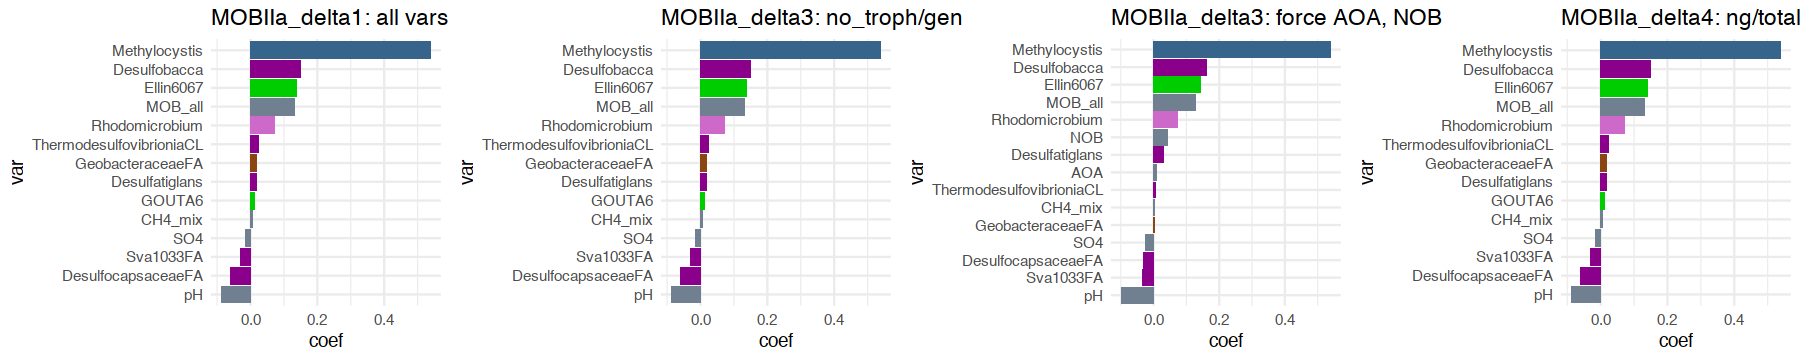

In [185]:
options(repr.plot.width = 15, repr.plot.height = 3)

plot_lasso_obj_list(mobIIa_lassos)

### iii) get SEM models, filtered, lists w plots

In [186]:
#"MOBIIa_delt_all", "MOBIIa_delt_ng", "MOBIIa_delt_fAOANOB", "MOBIIa_delt_ngt"

In [187]:
# MOB_IIa no CH4 guilds
MOBIIa_delt_ng_sem <- lasso_obj_to_sem_select_plots(MOBIIa_delt_ng, 'MOB_IIa', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)

# MOB_IIa no CH4 guilds
MOBIIa_delt_fAOANOB_sem <- lasso_obj_to_sem_select_plots(MOBIIa_delt_fAOANOB, 'MOB_IIa', Guild_CH4_dS, guild_colors,
                                         force_filt = c('AOA','NOB'), nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 1)

# MOB_IIa no CH4 guilds
MOBIIa_delt_ngt_sem <- lasso_obj_to_sem_select_plots(MOBIIa_delt_ngt, 'MOB_IIa', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 1)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



### iv) get model comparison plots

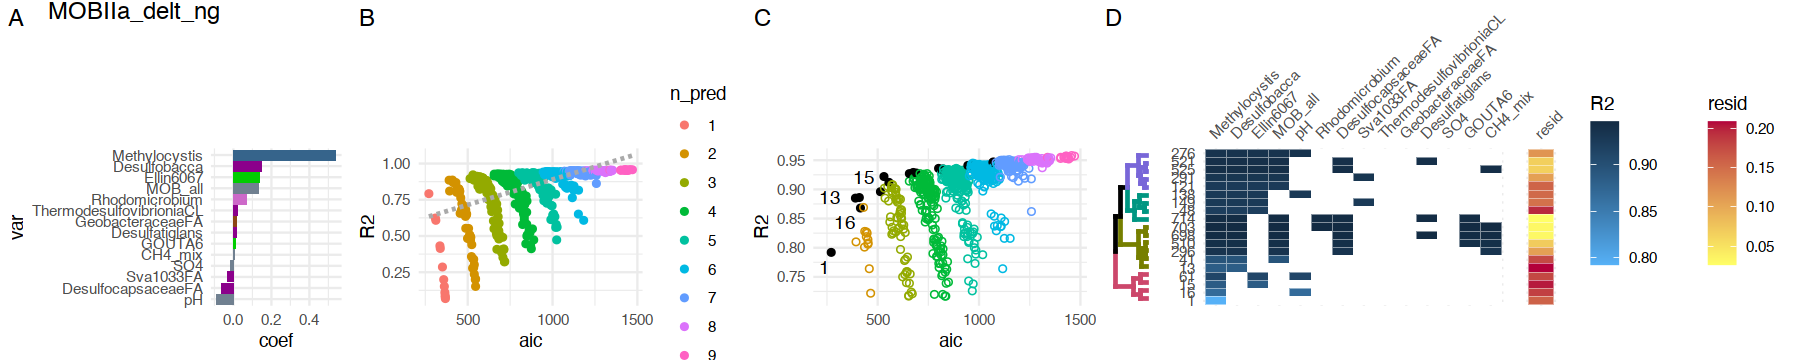

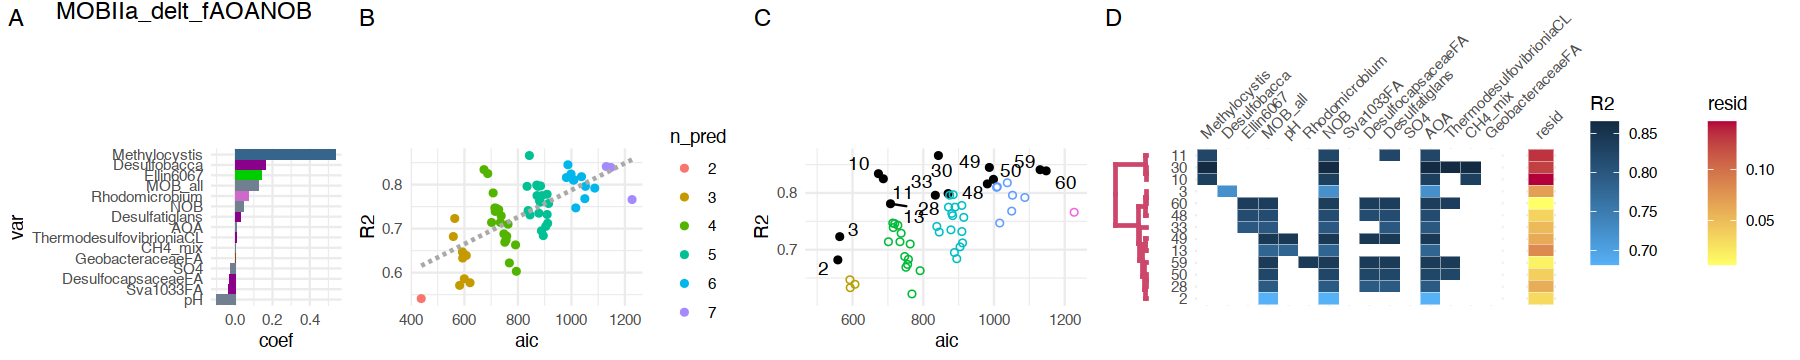

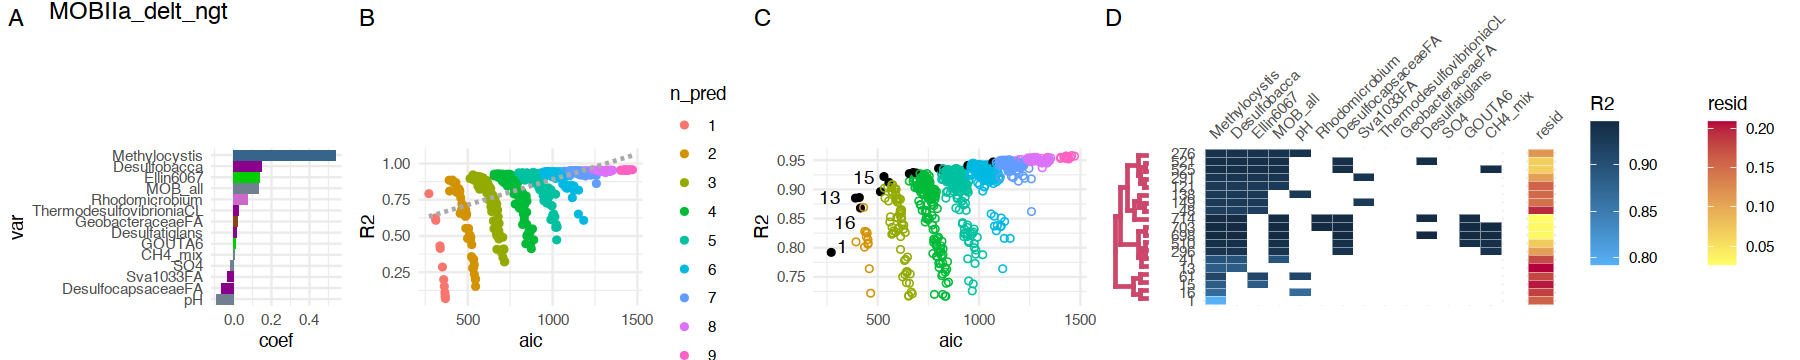

In [188]:
MOBIIa_delt_ng_sem$plot
MOBIIa_delt_fAOANOB_sem$plot
MOBIIa_delt_ngt_sem$plot

##### 

## d) CH4_ac models: LASSO feature selection

### i) select input data

In [189]:
#x_vars
#x_vars <- x_vars[!x_vars %in% 'Cl']   # DROP Cl
#x_vars <- x_vars[!x_vars %in% 'Salinity.x']   # DROP Cl
x_vars

[1] "CO2_mg_m2_h"              "Bulk_dens"               
 [3] "H2O_FPS"                  "pH"                      
 [5] "C"                        "N"                       
 [7] "P"                        "NO3_N"                   
 [9] "NH4_N"                    "Olsen_P"                 
[11] "Salinity.x"               "Cl"                      
[13] "SO4"                      "CH4_mix"                 
[15] "CH4_H2"                   "CH4_ac"                  
[17] "CH4_me"                   "MOB_I"                   
[19] "MOB_II"                   "MOB_IIa"                 
[21] "ANME"                     "AOA"                     
[23] "AOB"                      "NOB"                     
[25] "SRB_syn"                  "SRB"                     
[27] "FeRB"                     "CH4_all"                 
[29] "CH4_ac_mix"               "MOB_all"                 
[31] "Crenothrix"               "Desulfatiglans"          
[33] "Desulfobacca"             "DesulfocapsaceaeFA"      
[35] "Desulfomonile"            "DesulfosarcinaceaeFA"    
[37] "DesulfuromonadaceaeFA"    "Ellin6067"               
[39] "GeobacteraceaeFA"         "GOUTA6"                  
[41] "Leptolinea"               "Methyloceanibacter"      
[43] "Methylocystis"            "MethyloligellaceaeFA"    
[45] "Methylotenera"            "MND1"                    
[47] "Rhodomicrobium"           "Sva1033FA"               
[49] "ThermodesulfovibrioniaCL" "Thiobacillus"

In [190]:
# Initialize x vars for CH4_ac
CH4ac_drop.1 <- c('CO2_mg_m2_h','CH4_ac','CH4_H2','MOB_I','MOB_II','MOB_IIa','Olsen_P','P')       # first drop CH4 related
x_CH4ac.1 <- drop_from_list(CH4ac_drop.1, x_vars)                   # init list

# next drop N cycling microbes
CH4ac_drop.2 <- c('AOA', 'AOB', 'NOB')                                 
x_CH4ac.2 <- drop_from_list(CH4ac_drop.2, x_CH4ac.1) 

# then add chem ratios
#x_CH4ac.3 <- c(x_CH4ac.2, drop_ratios)                        - didn't work, unlist??
x_CH4ac.3 <- c(x_CH4ac.2,'CN','NP','NO3_NH4','NP_ext')                             # NO CP in data!!
 
# last, add some PW components
x_CH4ac.4 <- c(x_CH4ac.3, "DOC_mg_L", "Fe_pw")
#x_CH4ac.3 <- c('Bulk_dens','H2O_FPS','pH','C','Salinity.x','SO4','SRB_syn','SRB','FeRB', 'DOC_mg_L','Fe_pw')

# drop hard to explain vars

CH4ac_drop.5 <- c('NP', 'N')   
x_CH4ac.5 <- drop_from_list(CH4ac_drop.5, x_CH4ac.4)


### ii) create lasso objects, coef plots for diff scenarios

In [191]:
CH4ac_delta.1 <- lasso_mod_plot('CH4_ac', x_CH4ac.1, Guild_CH4_dS, guild_colors, plot_title = 'CH4ac_delta1: init vars')
CH4ac_delta.2 <- lasso_mod_plot('CH4_ac', x_CH4ac.2, Guild_CH4_dS, guild_colors, plot_title = 'CH4ac_delta2: no N guild')

CH4ac_delta.3 <- lasso_mod_plot('CH4_ac', x_CH4ac.3, Guild_CH4_dS, guild_colors, plot_title = 'CH4ac_delta3: add ratios')
CH4ac_delta.4 <- lasso_mod_plot('CH4_ac', x_CH4ac.4, Guild_CH4_dS, guild_colors, plot_title = 'CH4ac_delta4: add pw')

# Force SRB, FeRB into x4 (max vars)
CH4ac_d_fSrFeRB <- lasso_mod_plot('MOB_IIa', x_CH4ac.5, Guild_CH4_dS, guild_colors, 
                             force_in = c('FeRB','SRB_syn'), plot_title = 'CH4ac_delta4_fSrFeRB')

[1] "best_lambda: 0.0246"
     R2  RMSE
1 0.901 0.315
[1] "best_lambda: 0.0429"
     R2  RMSE
1 0.875 0.358


ERROR: Error in `[.data.frame`(data, x_vars): undefined columns selected


In [192]:
options(repr.plot.width = 15, repr.plot.height = 3)
ch4ac_lassos = c('CH4ac_delta.1','CH4ac_delta.2','CH4ac_delta.3','CH4ac_delta.4', 'CH4ac_d_fSrFeRB')

plot_lasso_obj_list(ch4ac_lassos)

ERROR: Error in get(i): object 'CH4ac_delta.3' not found


### iii) get SEM models, filtered, lists w plots

In [193]:
# MOB_IIa no CH4 guilds
CH4ac_delta.1_sem <- lasso_obj_to_sem_select_plots(CH4ac_delta.1, 'CH4_ac', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)

CH4ac_delta.2_sem <- lasso_obj_to_sem_select_plots(CH4ac_delta.2, 'CH4_ac', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)

CH4ac_delta.3_sem <- lasso_obj_to_sem_select_plots(CH4ac_delta.3, 'CH4_ac', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)

CH4ac_delta.4_sem <- lasso_obj_to_sem_select_plots(CH4ac_delta.4, 'CH4_ac', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)

CH4ac_delta_f_sem <- lasso_obj_to_sem_select_plots(CH4ac_d_fSrFeRB, 'CH4_ac', Guild_CH4_dS, guild_colors,
                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
                                         heat_filt = 0.65, k_clusts = 4)


#CH4ac_delta_f_sem <- lasso_obj_to_sem_select_plots(CH4ac_d_fSrFeRB, 'CH4_ac', Guild_CH4_dS, guild_colors,
#                                         nbest = 3, keep_filt = 0.5, resid_0filt = TRUE,  # sem filts
#                                         heat_filt = 0.65, k_clusts = 4)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



ERROR: Error in lasso_to_SEM_mods(lasso_obj, y_var, data, force_filt = force_filt, : object 'CH4ac_delta.3' not found


### iv) get model comparison plots

ERROR: Error in eval(expr, envir, enclos): object 'CH4ac_delta.3_sem' not found


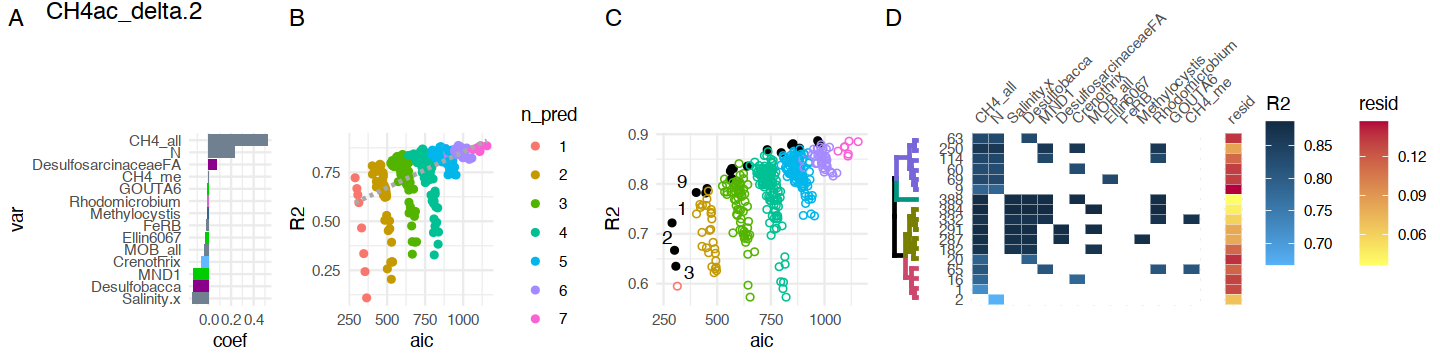

In [194]:
options(repr.plot.width=12, repr.plot.height= 3) # plot dims for combined plotsCH4ac_delta.1_sem$plot
CH4ac_delta.2_sem$plot
CH4ac_delta.3_sem$plot
CH4ac_delta.4_sem$plot
CH4ac_delta_f_sem$plot

### 4) save / load R object data 

In [195]:
# save.image(file = "CH4_Delta_SEM_models_noClP.RData")

# 4) DELTA composite SEM branched model CH4 workflows

- leaning on v1.08 here, copy and simplify.
- test do branches need to be run first?  forumulas composited?

In [196]:
# Define composite variable assignments
CH4_gen <- c("CH4_ac", "CH4_H2", "CO2_mg_m2_h", "Salinity.x", "SO4", "SRB", "FeRB")#, "NP")

CH4_ox <- c("MOB_IIa", "MOB_I", "MOB_II", "Bulk_dens", "H2O_FPS", 
            "N", "AOB", "AOA", "NOB", "NO3_N", "NH4_N", "NO3_NH4")

composite_sets <- c("CH4_gen", "CH4_ox")

### a) prepare data

#### i) tree base - all CH4 models

In [197]:
#CH4_da_tree_c

In [215]:
# pick base models
CH4_da_tree_s <- data.frame(CH4_da_tree_c[1:2,])   # picking first 6 models, others look funny, don't run? 
#tree_base <- CH4_da_tree_s
CH4_da_tree_s

,model_out,model,CH4_logn1,CH4_gen,CH4_ox,comp_failed,formula
,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
1,sem.dch4a.622,dch4a.622,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_I + MOB_II,,,CH4_gen,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_I + MOB_II
2,sem.dch4a.413,dch4a.413,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_I,,,"CH4_gen, CH4_ox",CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_I


##### x) failing updates, revert to v0.11 section 14) composite SEM test (above)

In [198]:
CH4_da_base_m <- get_sem_models_add_prefix(CH4_delt_all_sem, models = "filt_models", prefix = "dch4a.")
#CH4_da_base_m <- rename_formula_col_as_yvar(CH4_da_base_m, formula_col = 'form', fxn_operator = '~')
CH4_da_base_m

,model,aic,bic,npar,R2,form,all_sig,n_pred,aic_glm,bic_glm,aicc_glm,resid,vip_indx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
18,dch4a.622,986.729,1047.612,28,0.900,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_I + MOB_II,NA,6,57.28046,74.67556,59.85189,0.135,1
17,dch4a.413,851.467,897.129,21,0.891,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_I,NA,5,61.06525,76.28596,63.03016,0.202,2
16,dch4a.469,896.208,941.870,21,0.893,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca + MOB_II,NA,5,60.07634,75.29705,62.04125,0.179,3
15,dch4a.232,759.149,791.765,15,0.875,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + Desulfobacca,NA,4,68.19111,81.23743,69.63938,0.239,4
14,dch4a.219,715.730,748.345,15,0.854,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME + MOB_I,NA,4,78.31781,91.36413,79.76609,0.242,5
13,dch4a.81,624.608,646.352,10,0.832,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + ANME,NA,3,85.16875,96.04069,86.18570,0.271,6
12,dch4a.687,1043.318,1104.201,28,0.900,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + Desulfobacca + Methyloceanibacter + Sva1033FA + MOB_I,NA,6,57.42385,74.81895,59.99528,0.103,7
11,dch4a.771,1179.787,1258.065,36,0.891,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + Desulfobacca + Methyloceanibacter + Sva1033FA + CH4_ac + MOB_II,NA,7,64.87828,84.44776,68.15100,0.017,8
10,dch4a.772,1181.293,1259.571,36,0.893,CH4_logn1 ~ NA + CO2_mg_m2_h + Leptolinea + Desulfobacca + Methyloceanibacter + Sva1033FA + Thiobacillus + MOB_II,NA,7,63.99151,83.56100,67.26424,0.018,9


In [200]:
get_composites_model_table = function(model_table, composite_sets, assign_other = "y_var", other_name = "other",
                                      compos_fail_collapse_all = TRUE, # new here, keep some composites?
                                      split_y = "  ~", new_y_op = "~ ", no_int = TRUE, set_ops = " <~ ",      
                                      form_col = "form", model_col = "model", model_out_pfx = "sem."){
    
   ### 1) Get composite fail list data & COUNT fails ###  
    # Get last composite DF with composite fails--    move this OUTSIDE FXN?  USING any of those options here?
    composite_df <- get_composites_table_failures(model_table, composite_sets, assign_other = assign_other, 
                                                  other_name = other_name, split_y = split_y, new_y_op = new_y_op, 
                                                  no_int = no_int, set_ops = set_ops, form_col = form_col, 
                                                  model_col = model_col, model_out_pfx = model_out_pfx)
    # Get model indices
    model <- composite_df[,model_col]
    
    # get data for composite failure classes -- note is list of failed composites/model
    failed_col = "comp_failed"          # col for failed composites, add to FXN options? hardcoded in last FXN
    fail_df <- composite_df[failed_col]
    fail_list <- composite_df[,failed_col]
        
    # count items in failed composites, make DF with model indexing
    fail_len_list <- list()   
    for (i in 1:length(fail_list)){                                       # for rows in composite failed list/col 
        fail_len_list[[i]] <- length((fail_list[i][[1]]))                 # get n items in failed list
    }
    n_fail <- do.call(rbind, fail_len_list)                               # list to rows 
    fails_df <- data.frame(model, n_fail, stringsAsFactors = FALSE)       # add model to fails DF
    
    
   ### 2) SUBSET models on composite pass, fail, OR "neither" (part failure) ###
    n_compos <- length(composite_sets)                                    # another potential FXN option  
    
    pass_models <- fails_df[fails_df["n_fail"] == 0,][,"model"]           # PASS all composites   
    failed_models <- fails_df[fails_df["n_fail"] == n_compos,][,"model"]  # FAIL all composites  
    pass_fail_mods <- c(pass_models, failed_models)                       # list both pass and fail  
    part_fail_models <- model[!model %in% pass_fail_mods]                 # SOME composite fails, others pass
    
    # Fate of failed composite vars (compos_fail_collapse_all == TRUE)
    if(compos_fail_collapse_all == TRUE){                                 # collapse all composites if one fails  
        failed_models <- c(failed_models, part_fail_models)               # add part_failed_models to failed_models
    }    
    
    # Get DATAFRAMES for passing, failed, some fail
    pass_df <- composite_df[model %in% pass_models, ]                     # Data for all passing, ** USE AS IS **
    #failed_df <- composite_df[model %in% failed_models, ]                 # all failing,          modify 
    #part_df <- composite_df[model %in% part_fail_models, ]                # part failed,          replace 

    
   ### 3) Clean failed composite models ###  
       
    if(length(failed_models) > 0){
        
        # Get failed DF
        failed_df <- composite_df[model %in% failed_models, ]                 # all failing,          modify 
    
        # Extract y var name 
        formulae <- model_table[,form_col]                                    # get formulae to split
        y_var <- str_split(formulae, split_y) [[1]][[1]]                      # first row, column; assumes all are same
        replace_orig <- c(model_col, y_var)                                   # c(model, y_var colnames) 
    
        # get orig input formulas for replace in failed out DF
        keep_orig_vars <- c(model_col, form_col)                              # model and formula cols
        keep_orig <- model_table[keep_orig_vars]                              # get mod & form from input table
        orig_fails <- keep_orig[keep_orig[, model_col] %in% failed_models,]   # keep only failed model rows
        orig_fails <- setNames(orig_fails, replace_orig)                      # rename model_col to y_var
 
        # clean failed df  
        failed_df[,composite_sets] <- ''                                      # clean out composite info 
        replace_orig <- c(model_col, y_var)                                   # cols to replace w orig data
        failed_df[replace_orig] <- orig_fails[replace_orig]                   # replace orig data
    
        #Add 0 intercept to composites failures ? 
        if(no_int == TRUE){
            failed_df[y_var] <- str_replace(failed_df[,y_var], new_y_op, paste0(new_y_op, "0 + "))
        }
    } else {failed_df <- data.frame()}
    
    
   ### 4) Clean part failed composite models ###  
    
    if(length(part_fail_models) > 0){        
        
        part_df <- composite_df[model %in% part_fail_models, ]                 # get part df from part_failed 
        
        # Fate of failed composite vars (compos_fail_collapse_all == TRUE)
        if(compos_fail_collapse_all == FALSE){                                 # collapse all composites if one fails  
            part_df <- send_all_bad_composite_x_to_y_var(model_table = part_df, y_var, comp_string = " <~ 1\\*") # LAST ARG TO OPTIONS!
        }
    }  else {part_df <- data.frame()}

    
   ### 5) Combine all results ###    
    if(compos_fail_collapse_all == TRUE){
        out <- rbind(pass_df, failed_df)
    } else {
        out <- rbind(pass_df, part_df, failed_df)
    }

    # RECONSTITUTE FORMULA COLUMN # ID which columns are formulas, get as DF 
    form_cols <- c(y_var, composite_sets)
    form_data <- out[form_cols]                                                       # df of formula cols
    
    # paste formula components for new combined formulae
    paste_args <- c(form_data, sep="\n")                                              # do.call paste args
    formula <- do.call(paste, paste_args)                                             # formulae to DF
    formula <- str_replace(formula, "\n\n", "")                                       # no n\n\ (from empty) 
    out$formula <- formula                                                            # formulae to output
    
    # final cleaning - all formula columns to character -- some glitches obs. otherwise
    for (f in form_cols){
        out[f] <- as.character(out[,f])
    }
    
    return(out) 
}    

In [202]:
get_composites_table_failures = function(model_table, composite_sets, assign_other = "y_var", other_name = "other",
                                      split_y = "  ~", new_y_op = "~ ", no_int = TRUE, set_ops = " <~ ",      
                                      form_col = "form", model_col = "model", model_out_pfx = "sem."){
       
    # move this OUTSIDE FXN?  USING any of those options here?    
    # get composite forms model table from above fxn, pass all options
    composite_df <- get_composite_split_form_table(model_table, composite_sets, assign_other = assign_other, 
                                                  other_name = other_name, split_y = split_y, new_y_op = new_y_op, 
                                                  no_int = no_int, set_ops = set_ops, form_col = form_col, 
                                                  model_col = model_col, model_out_pfx = model_out_pfx)
  
    # Extract model numbers, out strings (to assign)
    model <- as.character(composite_df[,model_col])
      
    ### filter non-valid composite models (need > 1 var/composite) ###
    
    # method quirks: 1) str_split keeps y_var & x_var1 together, count as 1 var (not issue)
    #                2) length(vars_i...) counts empty strings as 1 var -- can work around:
    #                    - 2) workarounds: a) need > 2 vars for composite anyway; b) can drop blank w/o counter
    
    # get n vars in composites
    var_counts_plus1 <- list()                                      # row accumulator for length of split forms
    var_counts_compos <- list()                                     # compos. accum. for list of form. len/compos.
    
    for (j in composite_sets){    
       
        for (i in 1:nrow(composite_df)){
                       
            vars_i <- str_split(composite_df[,j], " \\+ ")          # split formulas into x's (keeps y~x1)
            var_counts_plus1[[i]] <-length(vars_i[i][[1]])          # get n elements (x's, BUT "" = 1, not 0)
          }
        
        var_counts_compos[[j]] <- var_counts_plus1
        }
       
    n_vars_compos <- data.frame(do.call(cbind, var_counts_compos))  # DF of variable counts/composite (w caveats above)
    
    
    # do n vars/model/composite exceed SEM min threshold? 
    var_thresh = 1                                                  # var threshold > 1, sem requires 2+)  
    
    for (j in composite_sets){ 
       
         n_vars_compos[j] <- ifelse(n_vars_compos[j] > var_thresh, "", j)
    }
    
    # something funny about data type (<chr[,1]>), simplify to char only
    n_vars_compos <- data.frame(lapply(n_vars_compos, as.character), stringsAsFactors = FALSE)
    n_vars_compos
    
    failed_list <- list()
    for (i in 1:nrow(n_vars_compos)){
        vars <- do.call(c, n_vars_compos[i,])
        names(vars) <- NULL
        vars <- vars[vars != ""]
        failed_list[[i]] <- vars
        }
    
    composite_df$comp_failed <- failed_list
    composite_df <- drop_vars_from_df(composite_df, other_name)
    composite_df
    
}  

In [204]:
get_composite_split_form_table = function(model_table, composite_sets, assign_other = "y_var", other_name = "other",
                                      split_y = "  ~", new_y_op = "~ ", no_int = TRUE, set_ops = " <~ ",      
                                      form_col = "form", model_col = "model", model_out_pfx = "sem."){
    
    ### 1) Get main model data: IDs, y, x_vars, combine ###
    
    # Extract model numbers, out strings (to assign)
    model <- as.character(model_table[,model_col])
    model_out <- paste0(model_out_pfx, model)
    
    # Extract y var
    formulae <- model_table[,form_col]
    y_var <- str_split(formulae, split_y) [[1]][[1]]           # first row, column; assumes all are same
    
    # Build y formula base
    y_ops <- paste(y_var, new_y_op)                            # "y ~"  
    compositeX <- paste(composite_sets, collapse= " + ")       # "comp1 + comp2..."
    if (no_int == TRUE){
        compositeX <- paste0("0 + ", compositeX)               # "0 + comp1 + ..."
    }
    
    # Get y base formula column, name by y_var
    y_form_base <- data.frame(paste0(y_ops, compositeX), stringsAsFactors = FALSE)                   
    names(y_form_base) <- y_var
            
    # X vars : get df of composite var assignments -- prior function
    composite_base <- assign_to_composite_split_df(model_table, composite_sets, form_col = form_col)
    
    # Combine model, y and X 
    composite_df <- data.frame(model_out, model, y_form_base, composite_base, stringsAsFactors = FALSE)
    
    
    ### 2) Assigning "other" vars to formulae ###
    # check if assign_other to y_var or composite
    if (assign_other == "y_var"){                                                    # if assign_other = y_var                          
        assign_other = y_var}                                                        # substitute y_var above
   
    # combine formulae from assigned & other, where neither are blank
    mix_other <- ifelse(composite_df[,other_name] == '', composite_df[,assign_other], # if other '', '', else         
                 ifelse(composite_df[,assign_other] == '', composite_df[,other_name], # if assign blank, else 
                 paste(composite_df[,assign_other], composite_df[,other_name], sep = " + "))) # combine forms   
    
    mix_other_df <- data.frame(mix_other, stringsAsFactors=FALSE)
    
    # add to composite DF, kludge for assign_other sometimes being transposed (CH4_ox, not CH4_gen, y var ???)    
    if (nrow(mix_other_df) > 1) {                                                    # transp has only 1 row
        composite_df[assign_other] = mix_other_df} else {                            # replace w other DF, else
        composite_df[assign_other] = t(mix_other_df)                                 # replace w t(other) DF
    }
    
    
    ### 3) Clean formulas, validate composites, produce table ###
    # add y <~ 1* to composite x_var formulas, where not blank.  First var '1*' sets scale of composite var (+/-) 
    for (j in composite_sets){                                                       # for each composite
        composite_df[j] <- ifelse(composite_df[,j] == '', '',                        # where not blank
                                  paste0(j, set_ops, "1*",composite_df[,j]))         # add y, op, "1*" = scaling
    }
    
    return(composite_df)

}    

In [206]:
assign_to_composite_split_df = function(model_table, form_col = "form", composite_sets){
    
    # init accumulators
    var_list       <- list()                                                # X var list / formula
    var_group_list <- list()                                                # X vars in set / formula / set
    out_group_list <- list()                                                # X vars not in set ""
    set_list       <- list()                                                # X lists for each set
    out_list       <- list()                                                # X lists not in each set
    other_list     <- list()                                                # X vars in nether set 
    #other_form     <- list()                                                # X vars in nether set, " + " sep
    
    # Loop over sets (j), rows in model table
    for (j in composite_sets){                                              # get lists of vars from each set

        set_vars <- get(j)                                                  # get set vars data

        for (i in 1:nrow(model_table)){

            # remove y var and get list of X vars from formula
            var_list <- get_unique_Xvars_in_formula_dfcol(model_table[i,], form_col = form_col)
            var_group_list[[i]] <- set_vars[set_vars %in% var_list]               # vars in set   
            var_group_list[[i]] <- paste(var_group_list[[i]], collapse = " + ")   # make formula style (?) 
            
            out_group_list[[i]] <- var_list[!var_list %in% set_vars]              # vars not in set
        }
    
        # Gather results for each set    
        set_list[[j]] <- var_group_list
        out_list[[j]] <- out_group_list
    }    
  
    # Make DFs of vars in and !in sets
    var_sets_df <- data.frame(do.call(cbind, set_list))
    out_vars <- data.frame(do.call(cbind, out_list))                       # df of vars ! in sets
    
    # Get duplicate vars among not-in-set vars (ie not in any set)
    for (i in 1:nrow(out_vars)){

        other_vars <- unlist(c(out_vars[i,]))                             # get all vars in row of df
        names(other_vars) <- NULL                                         # drop their indicies
        other_list[[i]] <- other_vars[duplicated(other_vars)]             # get only duplicated 
        other_list[[i]] <- paste(other_list[[i]], collapse = " + ")
        }
    
    # Add other vars col to var_sets DF
    var_sets_df$other <- other_list
    #var_sets_df$other_fxn <- other_form
    
    return(var_sets_df)
    
}


In [208]:
get_unique_Xvars_in_formula_dfcol = function(model_table, form_col = "form"){
    
    # Remove y vars, get only formulae
    no_y_table <- remove_yvar_from_df_formula_column(model_table, form_col)  # drop y var 
    forms_no_y <- no_y_table[,form_col]
    forms_no_y <- str_replace_all(forms_no_y, " ", "")                       # KLUDGE, sometimes extra space introduced

    # Get unique X vars among ALL of these formulas
    all_forms <- paste(forms_no_y, collapse = "+")                          # collapse rows into single string
    all_vars <- strsplit(all_forms, "\\+")                                  # split forms into vars 
    unique_vars <- unique(all_vars[[1]])                                    # get unique vars
    
    return(unique_vars) 
}

In [210]:
remove_yvar_from_df_formula_column =function(df, col_name, fxn_operator = '~ '){
    
    # start function 
    row_data = paste(df[,col_name])                                              # get vect of rows in column

    form_list = list()                                                           # empty list

    for (i in (seq_along(row_data)))     {                                       # for each column
        form_list[i] <- paste(unlist(strsplit(row_data[i], '~ '))[2])            # split, x_vars only to list
        }

    col_replace <- unlist(form_list)                                             # unlist
    df[,col_name] <- col_replace                                                 # replace column data
    return(df)                                                                   # return df

}

In [212]:
drop_vars_from_df = function(df, drop_vars){

    df_names <- unlist(names(df))
    keep_df_cols <- df_names[!df_names %in% drop_vars]
    df <- df[keep_df_cols]
    return(df)
}

In [213]:
# SEM tree base - Delta all
#CH4_da_base_m <- get_sem_models_add_prefix(CH4_delt_all_sem, models = "filt_models", prefix = "dch4a.")
#CH4_da_base_m <- rename_formula_col_as_yvar(results_table, formula_col = 'form', fxn_operator = '~')
CH4_da_tree_c <- get_composites_model_table(CH4_da_base_m, composite_sets, assign_other = "y_var",#)"CH4_gen", 
                           no_int = FALSE, compos_fail_collapse_all = TRUE)
#CH4_da_base_m

In [217]:
Guild_CH4_dS <- scale(Guild_CH4_d0)              #  careful will scale y 
Guild_CH4_dS <- data.frame(Guild_CH4_dS)          #  make df
Guild_CH4_dS$CH4_logn1 <- Guild_CH4_d0$CH4_logn1  # fix CH4 scale to original

In [219]:
# try running models - 
CH4_da_tree_r <- suppressWarnings(run_compare_sem_models(CH4_da_tree_s, Guild_CH4_dS, 
                                            estimator = "mlm", keep_mod_descr = c("model_out","model")))

ERROR: Error in lavParseModelString(model): lavaan ERROR: right hand side (rhs) of this formula:
    CH4_logn1 ~ NA+CO2_mg_m2_h+Leptolinea+ANME+Desulfobacca+MOB_I+MOB_II
    contains either a reserved word (in R) or an illegal character: “NA”
    See ?reserved for a list of reserved words in R
    Please use a variable name that is not a reserved word in R
    and use only characters, digits, or the dot symbol.


In [223]:
send_all_bad_composite_x_to_y_var = function(model_table, y_var, comp_string = " <~ 1\\*"){

    results = list()                             

    # Operate on each row, get component_lists and n 
    for (i in 1:nrow(model_table)){
    
        model_table_i <- model_table[i,]                          # Get model table row
        comp_failed_i <- model_table_i[,"comp_failed"][[1]]       # Get comp_failed / row
        n_failed_comp <- length(comp_failed_i)                    # Get length (comp_failed) = n_comp_failed /row
    
        # For row, send FIRST bad composite x to y_var, store as row output
        results_i <- send_one_bad_composite_x_to_y_var(model_table = model_table_i, fail_comp = comp_failed_i[1],
                                                      y_var = y_var, comp_string = comp_string) 
        
        # Accomodate ALL failed composites (if more than 1)
        if(length(comp_failed_i) < 2){                            # if 0 or 1 failed comps, 
            results[[i]] <- results_i                             # keep results_i
        } else {                                                  # if 2 or more failed comps 
            # iterate row function over other failed composites   # note model table = results_i
            for (k in comp_failed_i[-1]){                         # iterate over failed comps (not first):
            results_i <- send_one_bad_composite_x_to_y_var(model_table = results_i, fail_comp = k,
                              y_var = y_var, comp_string = comp_string)   
            }   
        }
        results[[i]] <- results_i                                 # accumulate row results
    }
    out <- do.call(rbind, results)                                       # make accumulated DF
    return(out)
}

send_one_bad_composite_x_to_y_var = function(model_table, fail_comp, y_var, comp_string = " <~ 1\\*"){
    
    # strip formula
    fail_comp_data <- model_table[,fail_comp]                                    # vect of failed comp formulae
    fail_comp_form_y <- paste0(fail_comp, comp_string)                           # get y + op string to delete 
    fail_comp_keep_vars <- str_replace(fail_comp_data, fail_comp_form_y, "")     # replace it w "", leaving x
    model_table['pass_failed'] <- fail_comp_keep_vars                            # new col of failed comp x

    # replace failed composite name in y formula w/ failed composite x           # y form is base of composite
    model_table[y_var] <- ifelse(model_table[,'pass_failed'] == '',              # if failed x is blank, 
                    str_replace(model_table[,y_var], paste0(" \\+ ", fail_comp), model_table[,'pass_failed']),
                    str_replace(model_table[,y_var], fail_comp, model_table[,'pass_failed']))
    
    # drop all failed component formulae from table. Would have bad behavior in loop, but to be run by row 
    model_table[fail_comp] <- ""                            
    model_table <- drop_vars_from_df(model_table, 'pass_failed')                 # drop new pass_failed_col
    
    return(model_table)
   
}

In [224]:
# SEM tree base - Delta all
#CH4_da_base_m <- CH4_delt_all_sem$filt_models         # source, LASS SEM FILTERED models (obj)
#CH4_da_base_m$model <- paste0("ch4da." ,CH4_da_base_m$model)

# Get composites for MODEL
CH4_da_tree_c <- get_composites_model_table(CH4_da_base_m, composite_sets, assign_other = "y_var",#)"CH4_gen", 
                           no_int = FALSE, compos_fail_collapse_all = FALSE)

#CH4_da_tree_c #-- note all but below fail compositing

# pick base models
CH4_da_tree_s <- CH4_da_tree_c[1:5,]   # picking first 6 models, others look funny, don't run? 
#tree_base <- CH4_da_tree_s
CH4_da_tree_s

,model_out,model,CH4_logn1,CH4_gen,CH4_ox,comp_failed,formula
,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
1,sem.dch4a.622,dch4a.622,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + ANME + Desulfobacca,,CH4_ox <~ 1*MOB_I + MOB_II,CH4_gen,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + ANME + DesulfobaccaCH4_ox <~ 1*MOB_I + MOB_II
8,sem.dch4a.771,dch4a.771,CH4_logn1 ~ CH4_gen + MOB_II + NA + Leptolinea + Desulfobacca + Methyloceanibacter + Sva1033FA,CH4_gen <~ 1*CH4_ac + CO2_mg_m2_h,,CH4_ox,CH4_logn1 ~ CH4_gen + MOB_II + NA + Leptolinea + Desulfobacca + Methyloceanibacter + Sva1033FA CH4_gen <~ 1*CH4_ac + CO2_mg_m2_h
10,sem.dch4a.766,dch4a.766,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca + Sva1033FA + Thiobacillus,,CH4_ox <~ 1*MOB_I + MOB_II,CH4_gen,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca + Sva1033FA + ThiobacillusCH4_ox <~ 1*MOB_I + MOB_II
11,sem.dch4a.683,dch4a.683,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca + Sva1033FA,,CH4_ox <~ 1*MOB_I + MOB_II,CH4_gen,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca + Sva1033FACH4_ox <~ 1*MOB_I + MOB_II
12,sem.dch4a.464,dch4a.464,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca,,CH4_ox <~ 1*MOB_I + MOB_II,CH4_gen,CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + DesulfobaccaCH4_ox <~ 1*MOB_I + MOB_II


In [225]:
CH4_da_tree_s$formula

[1] "CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + ANME + DesulfobaccaCH4_ox <~ 1*MOB_I + MOB_II"                                 
[2] "CH4_logn1 ~ CH4_gen + MOB_II + NA + Leptolinea + Desulfobacca + Methyloceanibacter + Sva1033FA\nCH4_gen <~ 1*CH4_ac + CO2_mg_m2_h\n"
[3] "CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca + Sva1033FA + ThiobacillusCH4_ox <~ 1*MOB_I + MOB_II"             
[4] "CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + Desulfobacca + Sva1033FACH4_ox <~ 1*MOB_I + MOB_II"                            
[5] "CH4_logn1 ~ CO2_mg_m2_h + CH4_ox + NA + Leptolinea + DesulfobaccaCH4_ox <~ 1*MOB_I + MOB_II"

In [226]:
# CH4 base model with forced MOB_IIa/CH4_ac (not filtered)
CH4_fg_base_m <-CH4_delt_f_mobac_sem$sem_models                # all models
CH4_fg_base_m$model <- paste0("ch4fg." ,CH4_fg_base_m$model)

# Get composites for MODEL
CH4_fg_tree_c <- get_composites_model_table(CH4_fg_base_m, composite_sets, assign_other = "CH4_gen", 
                           no_int = FALSE, compos_fail_collapse_all = TRUE)

#CH4_fg_tree_c
CH4_fg_tree_s <- CH4_fg_tree_c[1:7,]
CH4_fg_tree_s

ERROR: Error in eval(expr, envir, enclos): object 'CH4_delt_f_mobac_sem' not found


In [227]:
# tree_base <- CH4_fg_tree_s
tree_base <- CH4_da_tree_s

#### ii) tree base with CO2/C models

In [228]:
# CH4 base model with forced MOB_IIa/CH4_ac (not filtered)
CH4_co2c_base_m <-CH4_delt_CO2C_sem$filt_models               # all models
CH4_co2c_base_m$model <- paste0("ch4co2cD." ,CH4_co2c_base_m$model)

# Get composites for MODEL
CH4_co2c_tree_c <- get_composites_model_table(CH4_co2c_base_m, composite_sets, assign_other = "CH4_gen", 
                           no_int = FALSE, compos_fail_collapse_all = FALSE)
#CH4_co2c_tree_c
CH4_co2c_tree_s <- CH4_co2c_tree_c[1:5,]
CH4_co2c_tree_c

ch4_co2_pick <- c(1, 6, 7, 8, 18)
CH4_co2c_tree_s2 <- CH4_co2c_tree_c[ch4_co2_pick,]
# tree_base <- CH4_co2c_tree_s2


ERROR: Error in eval(expr, envir, enclos): object 'CH4_delt_CO2C_sem' not found


In [229]:
# Filter results by inspection 

In [230]:
# drop bad tree composites
CH4_co2c_tree_c <-CH4_co2c_tree_c[as.character(CH4_co2c_tree_c$comp_failed) == 'character(0)',]
CH4_co2c_tree_c
#CH4_co2c_tree_c$comp_failed #== character(0)

ERROR: Error in eval(expr, envir, enclos): object 'CH4_co2c_tree_c' not found


In [231]:
#CH4_co2c_tree_r <- run_sem_model_summary(CH4_co2c_tree_s2, Guild_CH4_dS, sort_by = 'pvalue', sort_cutoff = 0.01)

In [232]:
#CH4_co2c_tree_r

In [233]:
#tree_base 

#### iii) MOB models

In [234]:
# newer workflow
d_mob2af <- get_sem_models_add_prefix(MOBIIa_delt_fAOANOB_sem, models = "filt_models", prefix = "mob2af.")
d_mob2afa <- get_sem_models_add_prefix(MOBIIa_delt_fAOANOB_sem, models = "sem_models", prefix = "mob2afa.",
                                     filter = 'R2', cutoff = 0.3)

d_mob2ngt <- get_sem_models_add_prefix(MOBIIa_delt_ngt_sem, models = "filt_models", prefix = "mob2ngt.")
d_mob2ngta <- get_sem_models_add_prefix(MOBIIa_delt_ngt_sem, models = "sem_models", prefix = "mob2ngta.",
                                     filter = 'R2', cutoff = 0.3)

# assign to branch and get y-var
branch_1 <- d_mob2af#a
#branch_1 <- d_mob2ngta
branch_1 <- rename_formula_col_as_yvar(branch_1)

In [235]:
#branch_1 <- branch_1[branch_1$R2 > 0.6,]
branch_1 <- branch_1[order(-branch_1$R2),]

In [236]:
branch_1

,model,aic,bic,npar,R2,MOB_IIa,all_sig,n_pred,aic_glm,bic_glm,aicc_glm,resid,vip_indx
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
12,mob2af.30,842.785,888.447,21,0.866,MOB_IIa ~ NA + Methylocystis + NOB + AOA + ThermodesulfovibrioniaCL + CH4_mix,NA,5,67.04537,82.26608,69.01028,0.127,2
6,mob2af.49,986.869,1047.752,28,0.845,MOB_IIa ~ NA + MOB_all + pH + NOB + DesulfocapsaceaeFA + Desulfatiglans + AOA,NA,6,78.12917,95.52427,80.70060,0.062,8
4,mob2af.59,1130.351,1208.629,36,0.841,MOB_IIa ~ NA + MOB_all + Rhodomicrobium + NOB + DesulfocapsaceaeFA + Desulfatiglans + AOA + ThermodesulfovibrioniaCL,NA,7,81.77466,101.34415,85.04739,0.014,10
9,mob2af.60,1147.544,1225.822,36,0.839,MOB_IIa ~ NA + Ellin6067 + MOB_all + NOB + DesulfocapsaceaeFA + Desulfatiglans + AOA + ThermodesulfovibrioniaCL,NA,7,82.71364,102.28312,85.98636,0.006,5
11,mob2af.10,673.249,705.865,15,0.834,MOB_IIa ~ NA + Methylocystis + NOB + AOA + CH4_mix,NA,4,78.68735,91.73368,80.13563,0.147,3
13,mob2af.11,687.080,719.696,15,0.825,MOB_IIa ~ NA + Methylocystis + NOB + Desulfatiglans + AOA,NA,4,82.09318,95.13951,83.54146,0.133,1
3,mob2af.50,998.452,1059.335,28,0.824,MOB_IIa ~ NA + MOB_all + NOB + DesulfocapsaceaeFA + Desulfatiglans + AOA + ThermodesulfovibrioniaCL,NA,6,86.43468,103.82978,89.00611,0.037,11
8,mob2af.48,981.193,1042.076,28,0.816,MOB_IIa ~ NA + Ellin6067 + MOB_all + NOB + DesulfocapsaceaeFA + Desulfatiglans + AOA,NA,6,89.40779,106.80289,91.97922,0.034,6
7,mob2af.33,870.358,916.020,21,0.799,MOB_IIa ~ NA + Ellin6067 + MOB_all + NOB + Desulfatiglans + AOA,NA,5,93.11749,108.33820,95.08240,0.051,7


#### iv) CH4 ac models

In [237]:
d_ch4ac.2 <- get_sem_models_add_prefix(CH4ac_delta.2_sem, prefix = "dac2.")
d_ch4ac.2a <- get_sem_models_add_prefix(CH4ac_delta.2_sem, models = "sem_models", prefix = "dac2.",
                                     filter = 'R2', cutoff = 0.5)

d_ch4ac.3 <- get_sem_models_add_prefix(CH4ac_delta.3_sem, prefix = "dac3.")
d_ch4ac.3a <- get_sem_models_add_prefix(CH4ac_delta.3_sem, models = "sem_models", prefix = "dac3a.",
                                     filter = 'R2', cutoff = 0.5)
d_ch4ac.4 <- get_sem_models_add_prefix(CH4ac_delta.4_sem, prefix = "dac4.")
d_ch4ac.4a <- get_sem_models_add_prefix(CH4ac_delta.4_sem, models = "sem_models", prefix = "dac4a.",
                                     filter = 'R2', cutoff = 0.3)

d_ch4ac.4f <- get_sem_models_add_prefix(CH4ac_delta_f_sem, prefix = "dac4f.")
d_ch4ac.4fa <- get_sem_models_add_prefix(CH4ac_delta_f_sem, models = "sem_models", prefix = "dac4a.",
                                     filter = 'R2', cutoff = 0.3)

# assign to branch and get y-var
branch_2 <- d_ch4ac.2#a
branch_2 <- rename_formula_col_as_yvar(branch_2)

ERROR: Error in get_sem_models_add_prefix(CH4ac_delta.3_sem, prefix = "dac3."): object 'CH4ac_delta.3_sem' not found


In [238]:
#branch_2 <- branch_2[branch_2$R2 > 0.65,]

In [239]:
branch_2

ERROR: Error in eval(expr, envir, enclos): object 'branch_2' not found


### b) run models 

#### i) combine branches

In [240]:
# tree_base <- CH4_fg_tree_s
tree_base <- CH4_da_tree_s
# tree_base <- CH4_co2c_tree_s2

In [241]:
# make list of branches
#head(branch_1)
# branchz <- list(branch_1)
branchz2 <- list(branch_1, branch_2)

ERROR: Error in eval(expr, envir, enclos): object 'branch_2' not found


In [242]:
# combine branches, check n models-- note 720 models = 118 GB peak ram w delta DS
sem_formula_tree_d <-sem_tree_formula_build(tree_base, branchz2)
dim(sem_formula_tree_d)
head(sem_formula_tree_d)

ERROR: Error in combine_sem_model_layers(tree_base, branches[[1]]): could not find function "combine_sem_model_layers"


#### ii) run models

In [243]:
# run simple delta models (4 min for 720? -- smaller data set) -- use SCALED dataset!! fails otherwise (& slower)!
sem_run_test_d <- run_sem_model_summary(sem_formula_tree_d, Guild_CH4_dS, sort_by = 'pvalue', sort_cutoff = 0.001) # pass parallel!!

ERROR: Error in run_sem_model_summary(sem_formula_tree_d, Guild_CH4_dS, sort_by = "pvalue", : could not find function "run_sem_model_summary"


In [244]:
sem_run_test_d
# dim(sem_run_test_d)
# head(sem_run_test_d)

ERROR: Error in eval(expr, envir, enclos): object 'sem_run_test_d' not found


In [245]:
# filter results before printing
# sem_run_test_d <- sem_run_test_d[sem_run_test_d$pvalue > 0.05,]

In [246]:
# write.table(sem_run_test_d, "auto_tables/delta_CO2C2_mobafa_ac.4a_noClP_1140.txt", sep='\t', row.names=FALSE)
# write.table(sem_run_test_d, "auto_tables/delta_CH7f_mob_2afaf_ac4af_noClP_1330.txt", sep='\t', row.names=FALSE)

#write.table(sem_run_test, "auto_tables/delta_CO2C_mobaf_ac.2_noSal_675.txt", sep='\t', row.names=FALSE)
# write.table(sem_run_test_d, "auto_tables/delta_CH7f_mobngALL_ac2a_noSal_1953.txt", sep='\t', row.names=FALSE)

## 5) Single sided branched models CH4 + MOB; CH4 + CH4_ac

## c) single sided CH4_MOB trees

In [247]:
# tree_base <- CH4_fg_tree_s
tree_base <- CH4_da_tree_s
#tree_base <- CH4_fg_tree_s
#tree_base <- CH4_co2c_tree_s2

In [248]:
# assign to branch and get y-var 
branch_1 <- d_mob2afa                                    # 2af, 2afa
#branch_1 <- d_mob2ngta                                 # 2ngt, 2ngta  
branch_1 <- rename_formula_col_as_yvar(branch_1)

In [249]:
branchz <- list(branch_1)

In [250]:
# combine branches, check n models-- note 720 models = 118 GB peak ram w delta DS
sem_formula_tree_d <-sem_tree_formula_build(tree_base, branchz)
sem_formula_tree_d

ERROR: Error in combine_sem_model_layers(tree_base, branches[[1]]): could not find function "combine_sem_model_layers"


In [251]:
# run simple delta models (4 min for 720? -- smaller data set) -- use SCALED dataset!! fails otherwise (& slower)!
# sem_run_test_d_mob <-run_sem_model_summary(sem_formula_tree_d, Guild_CH4_dS, sort_by = 'pvalue', sort_cutoff = 0.001) # pass parallel!!

In [252]:
# sem_run_test_d_mob

In [253]:
# filter results before printing
# sem_run_test__mob <- sem_run_test__mob[sem_run_test_mob$pvalue > 0.05,]

In [254]:
# write.table(sem_run_test_d_mob, "auto_tables/MOB_delta_CH4f5_fga_noClP_60.txt", sep='\t', row.names=FALSE)

## d) single sided CH4_ac trees

In [255]:
tree_base <- CH4_fg_tree_s
#tree_base <- CH4_da_tree_s

ERROR: Error in eval(expr, envir, enclos): object 'CH4_fg_tree_s' not found


In [256]:
# assign to branch and get y-var
branch_2 <- d_ch4ac.4fa                               #2, 2a, 3, 3a, 4, 4a, 4f, 4fa
branch_2 <- rename_formula_col_as_yvar(branch_2)

ERROR: Error in eval(expr, envir, enclos): object 'd_ch4ac.4fa' not found


In [257]:
branchz <- list(branch_2)

ERROR: Error in eval(expr, envir, enclos): object 'branch_2' not found


In [258]:
# combine branches, check n models-- note 720 models = 118 GB peak ram w delta DS
sem_formula_tree_d <-sem_tree_formula_build(tree_base, branchz)
sem_formula_tree_d

ERROR: Error in combine_sem_model_layers(tree_base, branches[[1]]): could not find function "combine_sem_model_layers"


In [259]:
# run simple delta models (4 min for 720? -- smaller data set) -- use SCALED dataset!! fails otherwise (& slower)!
# sem_run_test_d_ac <-run_sem_model_summary(sem_formula_tree_d, Guild_CH4_dS, sort_by = 'pvalue', sort_cutoff = 0.05) # pass parallel!!

In [260]:
#sem_run_test_d_ac

In [261]:
# filter results before printing
# sem_run_test_d_ac <- sem_run_test_d_ac[sem_run_test_d_ac$pvalue > 0.05,]

In [262]:
# write.table(sem_run_test_d_ac, "auto_tables/CH4f7_acf4a_delta_noClP_1022.txt", sep='\t', row.names=FALSE)